In [1]:
# analysis_Xe_Xe 5.44 TeV Xe-Xe analysis script
import analysis_Xe_Xe as analysis

SyntaxError: keyword argument repeated: label (analysis_Xe_Xe.py, line 116)

In [2]:
import pandas as pd
def load_design():
    
    # these are the problematic design points for Xe Xe 5440 w/ 1000 design points
    nan_design_pts_set_Xe = set([354, 494, 601, 682, 699, 719, 736, 758, 768, 770, 834, 902, 908, 949])
    unfinished_design_pts_set_Xe = set([328, 354, 562, 672, 682, 736, 818, 897, 902])
    delete_design_pts_set_Xe = nan_design_pts_set_Xe.union(unfinished_design_pts_set_Xe)
    
    main_dir = 'design_pts_Xe_Xe_5440_production'   
    design_file = f'{main_dir}/design_points_main_XeXe-5440.dat'
    range_file = f'{main_dir}/design_ranges_main_XeXe-5440.dat'
    design = pd.read_csv(design_file, index_col=0)
    design = design.drop(labels=list(delete_design_pts_set_Xe), errors='ignore')
    labels = design.keys()
    design_range = pd.read_csv(range_file) # prior
    design_max = design_range['max'].values
    design_min = design_range['min'].values
    return design, labels, design_max, design_min

design, labels, design_max, design_min = load_design()    

### Reading data (design points and x_T bins)

In [5]:
# Reading data (design points and x_T bins)

import numpy as np
import matplotlib.pyplot as plt

dir_path = 'universal_xexe/universal'
dp = 0 # We have 1000 design points
df = 0 # delta_f index = {Grad = 0, CE = 1, PTM = 2, PTB = 3}
file_name = f'universal_dp{dp}_df{df}.txt'
xt_file_name = 'xt_jestcape.dat' # reading x_T bins (equal over design points and identical to the experimental bins, different over centralities).
xt_path = f'{dir_path}/{xt_file_name}'
path = f'{dir_path}/{file_name}'

data = np.loadtxt(path, comments='#') # 2D array: (centrality bin, x_T bin) = (9, 42)
xt_bins = np.loadtxt(xt_path, comments='#') # 2D array: (centrality bin, x_T bin) = (9, 42)

### Plotting one desing point for a specific viscous correction

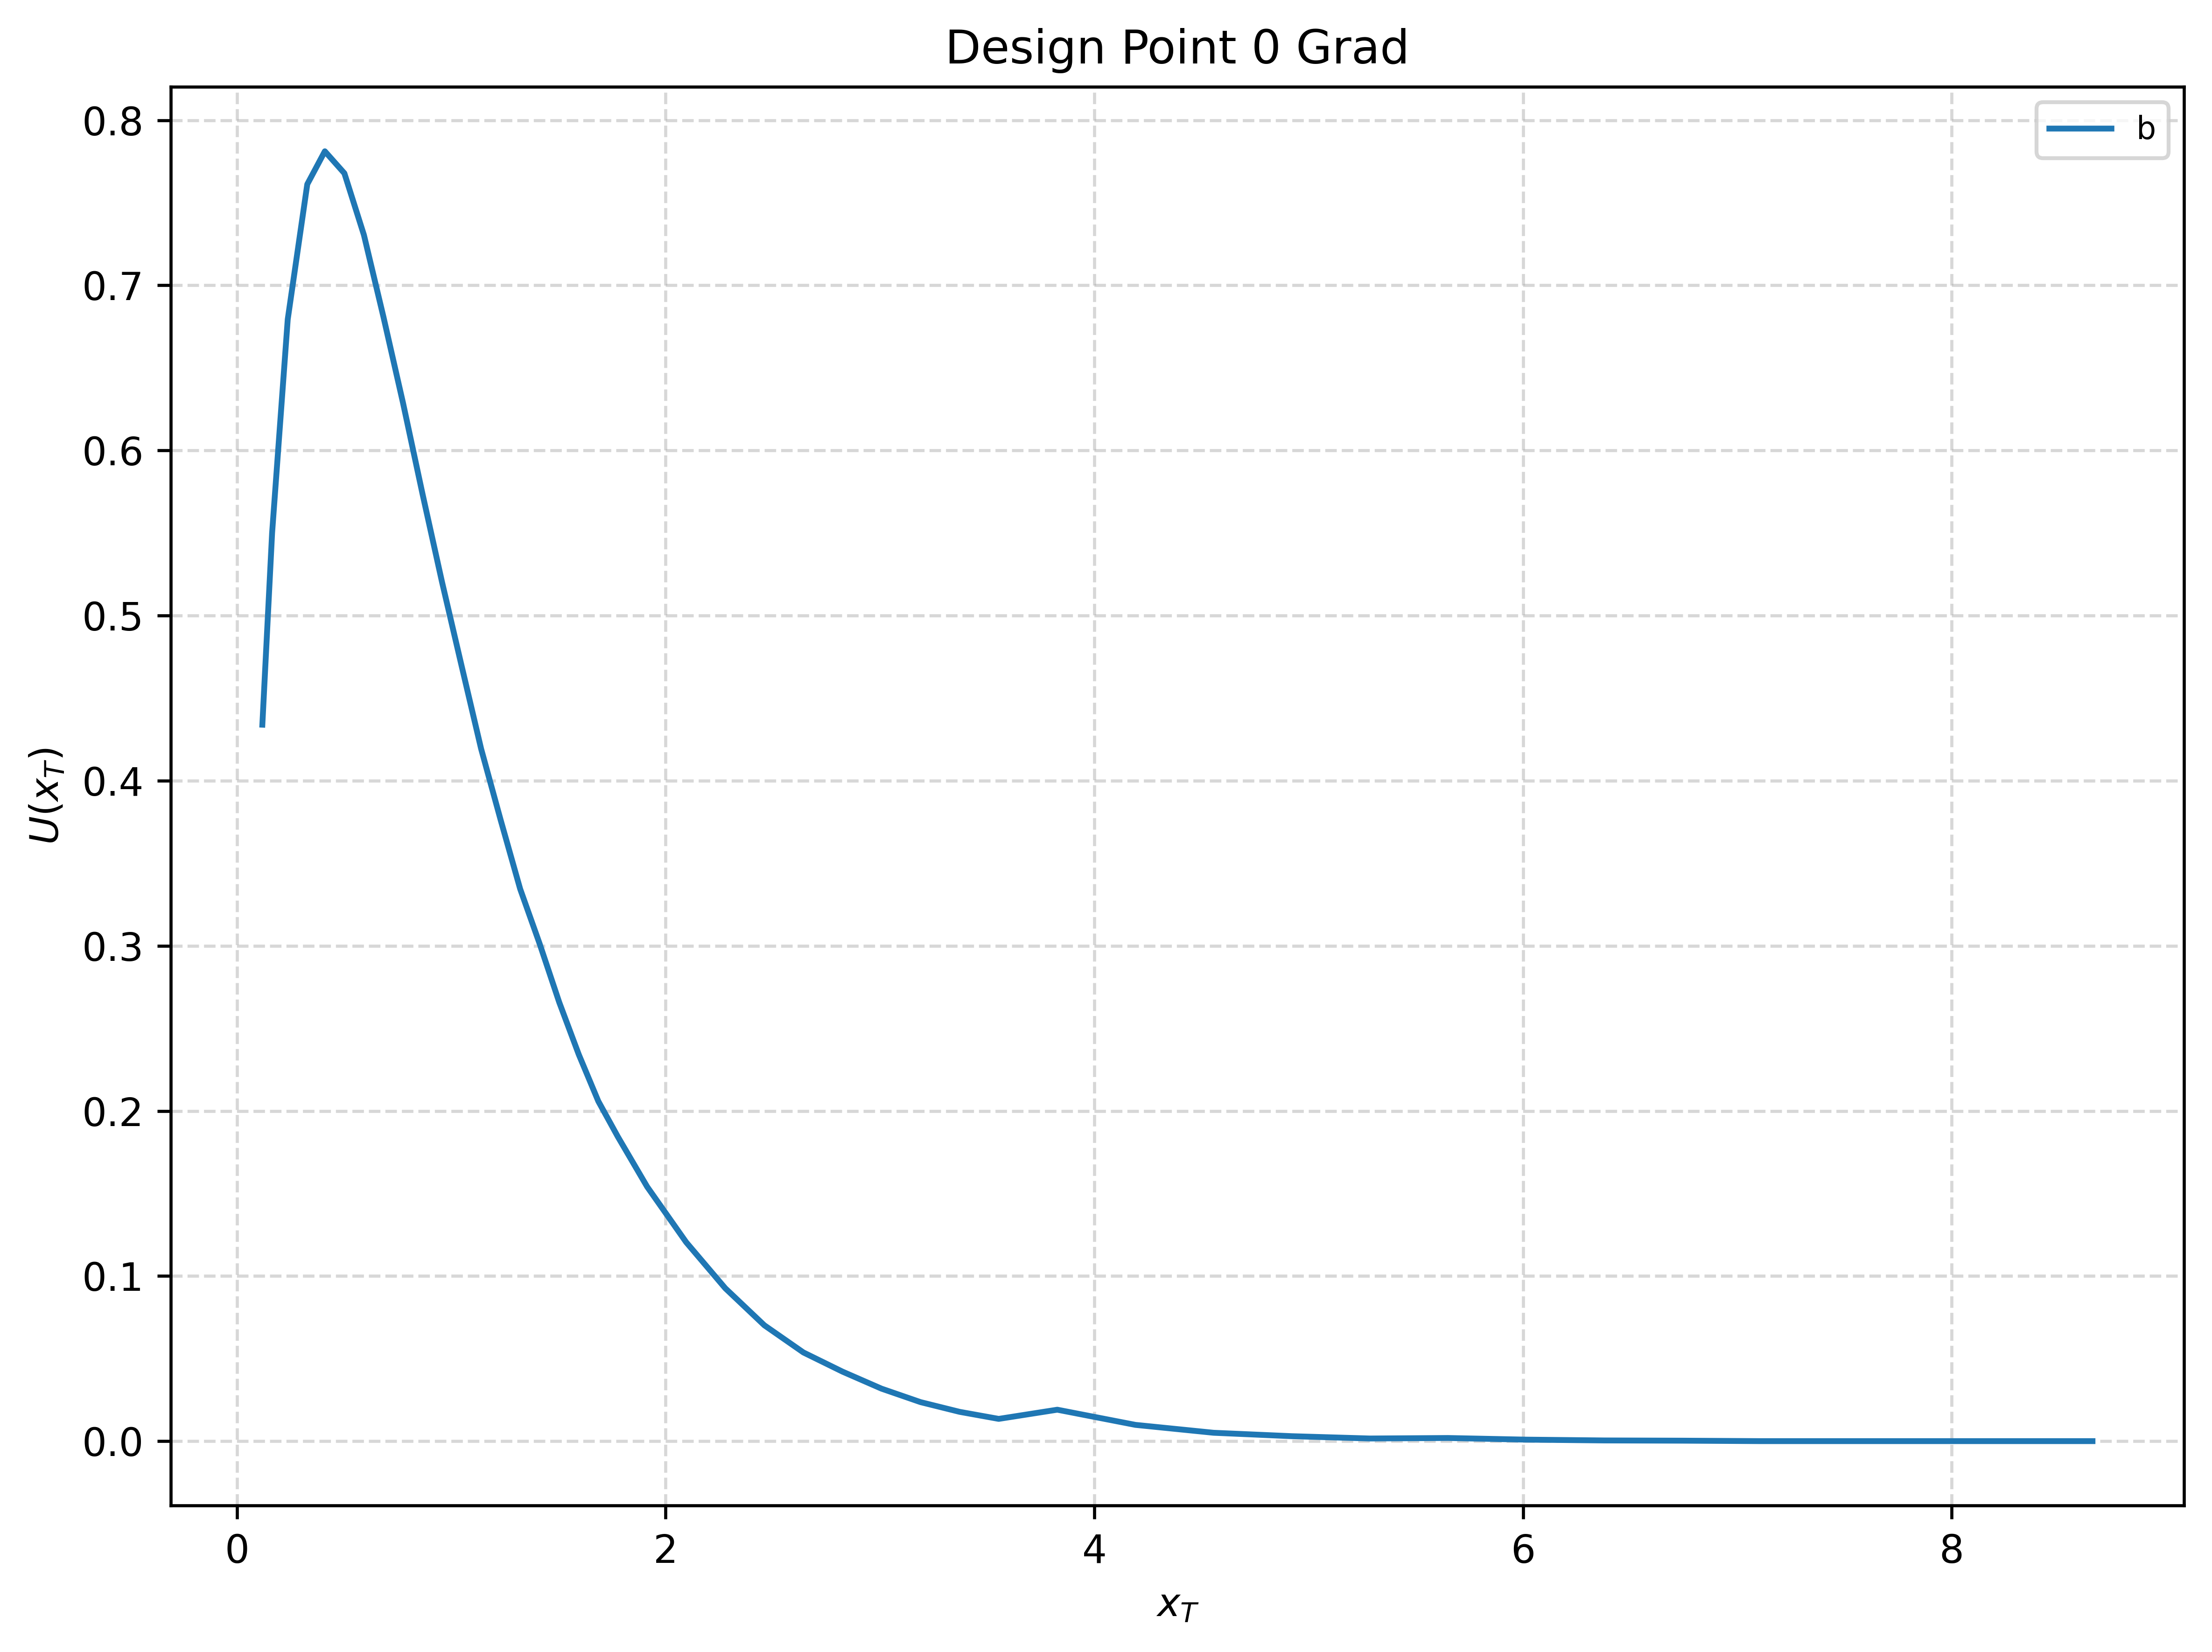

In [7]:
# Plotting data 
df_name = {0: "Grad", 1: "CE", 2: "PTM", 3: "PTB"} 

plt.figure(figsize=(8,6), dpi=600)
plt.plot(xt_bins[0], data[0], label='XeXe 5.44 TeV') # plotting the first centrality 0-5%
plt.title(f'Design Point {dp} {df_name[0]}')
plt.xlabel(r'$x_T$')
plt.ylabel(r'$U(x_T)$')
plt.legend('best', fontsize=8)
plt.grid(True, ls='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [8]:
# Loading all design points
import os
import numpy as np
import matplotlib.pyplot as plt

# --- 1) Loader --------------------------------------------------------------
def load_design_point_spectra(
    df: int,
    base_dir: str = "universal_xexe/universal",
    xt_fname: str = "xt_jestcape.dat",
) -> (dict, np.ndarray):
    """
    Scans base_dir for 'universal_dp{dp}_df{df}.txt' files.
    Returns:
      spectra: dict mapping dp -> array shape (n_cent, n_xt)
      xt_bins: array shape (n_cent, n_xt) loaded from xt_fname
    """
    spectra = {}
    # load the common xT grid
    xt_path = os.path.join(base_dir, xt_fname)
    xt_bins = np.loadtxt(xt_path, comments="#")  # (n_cent, n_xt)
    
    # read each design point file
    for fname in sorted(os.listdir(base_dir)):
        if fname.startswith("universal_dp") and f"_df{df}.txt" in fname:
            dp = int(fname.split("dp")[1].split("_")[0])
            arr = np.loadtxt(os.path.join(base_dir, fname), comments="#")
            if arr.shape != xt_bins.shape:
                raise ValueError(f"Shape mismatch for dp={dp}: {arr.shape} vs {xt_bins.shape}")
            spectra[dp] = arr
    return spectra, xt_bins

DF = 0 # delta f
BASE_DIR = "universal_xexe/universal"
spectra_dict, xt = load_design_point_spectra(DF, BASE_DIR)
dp = 0 # design point index
print(spectra_dict[dp].shape)

(9, 42)


### Plotting by centrality: one design point for a specific viscous correction

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt

# --- 1) Loader --------------------------------------------------------------
def load_design_point_spectra(
    df: int,
    base_dir: str = "universal_xexe/universal",
    xt_fname: str = "xt_jetscape.dat",
) -> (dict, np.ndarray):
    """
    Scans base_dir for 'universal_dp{dp}_df{df}.txt' files.
    Returns:
      spectra: dict mapping dp -> array shape (n_cent, n_xt)
      xt_bins: array shape (n_cent, n_xt) loaded from xt_fname
    """
    spectra = {}
    # load the common xT grid
    xt_path = os.path.join(base_dir, xt_fname)
    xt_bins = np.loadtxt(xt_path, comments="#")  # (n_cent, n_xt)
    
    # read each design point file
    for fname in sorted(os.listdir(base_dir)):
        if fname.startswith("universal_dp") and f"_df{df}.txt" in fname:
            dp = int(fname.split("dp")[1].split("_")[0])
            arr = np.loadtxt(os.path.join(base_dir, fname), comments="#")
            if arr.shape != xt_bins.shape:
                raise ValueError(f"Shape mismatch for dp={dp}: {arr.shape} vs {xt_bins.shape}")
            spectra[dp] = arr
    return spectra, xt_bins

# --- 2) Per‐centrality grid of plots -----------------------------------------
def plot_by_centrality(
    dp: int,
    spectra: dict,
    xt_bins: np.ndarray,
    df: int,
    options: dict = None
):
    """
    For a single design point dp, plots U(xT) vs xT in a grid of subplots,
    one row per centrality.
    """
    opts = {
        "figsize": (12, 8),
        "dpi": 150,
        "centrality_labels": ['0–5%', '5–10%','10–20%','20–30%','30–40%','40–50%','50–60%','60–70%','70–90%'],
        "color": "C0",
        "marker": "o",
        "linestyle": "-",
        "ncols": 3,
        "xlabel": r"$x_T$",
        "ylabel": r"$U(x_T)$",
        "log_scale": False,
        "xlim": None,
        "ylim": None,
        "title_template": "dp={dp}, df={df} ({df_name}), cent={cent}",
        "df_names": {0: "Grad", 1: "CE", 2: "PTM", 3: "PTB"},
        "save_path": None
    }
    if options: opts.update(options)
    
    data = spectra.get(dp)
    if data is None:
        raise KeyError(f"No spectra found for dp={dp}")
    
    n_cent, n_xt = data.shape
    ncols = opts["ncols"]
    nrows = int(np.ceil(n_cent/ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=opts["figsize"], dpi=opts["dpi"])
    axes = axes.flatten()
    
    for i in range(n_cent):
        ax = axes[i]
        x = xt_bins[i]
        y = data[i]
        ax.plot(x, y,
                color=opts["color"],
                marker=opts["marker"],
                linestyle=opts["linestyle"],
                label=opts["centrality_labels"][i])
        ax.set_title(opts["title_template"].format(
            dp=dp, df=df, df_name=opts["df_names"][df], cent=opts["centrality_labels"][i]
        ), fontsize=10)
        ax.set_xlabel(opts["xlabel"])
        ax.set_ylabel(opts["ylabel"])
        if opts["log_scale"]:
            ax.set_xscale("log")
        if opts["xlim"]:
            ax.set_xlim(*opts["xlim"])
        if opts["ylim"]:
            ax.set_ylim(*opts["ylim"])
        ax.grid(True, ls="--", alpha=0.4)
        ax.legend(fontsize=8)
    
    # turn off any extra axes
    for ax in axes[n_cent:]:
        ax.axis("off")
    
    plt.tight_layout()
    if opts["save_path"]:
        plt.savefig(opts["save_path"], bbox_inches="tight")
        plt.close(fig)
    else:
        plt.show()


# --- 3) Overlay all centralities in one panel --------------------------------
def plot_overlay(
    dp: int,
    spectra: dict,
    xt_bins: np.ndarray,
    df: int,
    options: dict = None
):
    """
    For a single design point dp, overlays U(xT) for all centralities on one axes.
    """
    opts = {
        "figsize": (8, 6),
        "dpi": 150,
        "centrality_labels": ['0–5%', '5–10%','10–20%','20–30%','30–40%','40–50%','50–60%','60–70%','70–90%'],
        "colormap": {0: "blue", 1: "red", 2: "magenta", 3: "green"},
        "linestyles": None,     # e.g. ["-","--",":","-.",...]
        "marker": None,
        "xlabel": r"$x_T$",
        "ylabel": r"$U(x_T)$",
        "log_scale": False,
        "xlim": None,
        "ylim": None,
        "title_template": "dp={dp}, df={df} ({df_name})",
        "df_names": {0: "Grad", 1: "CE", 2: "PTM", 3: "PTB"},
        "save_path": None
    }
    if options: opts.update(options)
    
    data = spectra.get(dp)
    if data is None:
        raise KeyError(f"No spectra for dp={dp}")
    
    fig, ax = plt.subplots(figsize=opts["figsize"], dpi=opts["dpi"])
    n_cent, n_xt = data.shape
    
    for i in range(n_cent):
        x = xt_bins[i]
        y = data[i]
        color = opts["colormap"](i % 10)
        ls = opts["linestyles"][i] if opts["linestyles"] else "-"
        mk = opts["marker"]
        ax.plot(x, y, color=color, linestyle=ls, marker=mk,
                label=opts["centrality_labels"][i])
    
    ax.set_title(opts["title_template"].format(
        dp=dp, df=df, df_name=opts["df_names"][df]
    ), fontsize=12)
    ax.set_xlabel(opts["xlabel"])
    ax.set_ylabel(opts["ylabel"])
    if opts["log_scale"]:
        ax.set_xscale("log")
    if opts["xlim"]:
        ax.set_xlim(*opts["xlim"])
    if opts["ylim"]:
        ax.set_ylim(*opts["ylim"])
    ax.grid(True, ls="--", alpha=0.4)
    ax.legend(ncol=2, fontsize=8, loc="best")
    plt.tight_layout()
    
    if opts["save_path"]:
        plt.savefig(opts["save_path"], bbox_inches="tight")
        plt.close(fig)
    else:
        plt.show()


# --- Usage Example ----------------------------------------------------------

if __name__ == "__main__":
    DF = 0
    BASE_DIR = "universal_xexe/universal"
    spectra_dict, xt = load_design_point_spectra(DF, BASE_DIR)
    
#    DP = 0
    # plot each centrality in its own subplot:
    plot_by_centrality(
        dp=DP,
        spectra=spectra_dict,
        xt_bins=xt,
        df=DF,
        options={
            "log_scale": True,
            "ylim": (1e-4, 2.0),
            "xlim": (0.1, 10),
#            "save_path": f"dp{DP}_df{DF}_by_cent.pdf"
        }
    )
    
    # overlay all centralities on one axes:
#    plot_overlay(
#        dp=DP,
#        spectra=spectra_dict,
#        xt_bins=xt,
#        df=DF,
#        options={
#            "log_scale": True,
#            "ylim": (1e-4, 2.0),
#            "xlim": (0.1, 10),
#            "save_path": f"dp{DP}_df{DF}_overlay.pdf"
#        }
#    )

FileNotFoundError: universal_xexe/universal/xt_jetscape.dat not found.

### Plotting all design points for a specific viscous correction

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

df_name = {0: "Grad", 1: "CE", 2: "PTM", 3: "PTB"}

def plot_all_design_points_by_centrality(
    df: int,
    base_dir: str = "universal_xexe/universal",
    xt_fname: str = "xt_jestcape.dat",
    options: dict = None
):
    """
    For a given delta_f index, read every design point and produce one PDF per centrality bin,
    where each PDF overlays the U(xT) curves of _all_ design points.
    """
    # defaults & merge
    opts = {
        "dpi": 200,
        "figsize": (6, 4),
        "alpha": 0.2,
        "color": "C0",
        "xlabel": r"$x_T$",
        "ylabel": r"$U(x_T)$",
        "log_scale": False,
        "xlim": None,
        "ylim": None,
        "centrality_labels": ['0–5%','5–10%','10–20%','20–30%','30–40%','40–50%','50–60%','60–70%','70–90%'],
        "save_folder": f"dp_by_centrality_df{df}"
    }
    if options: opts.update(options)
    os.makedirs(opts["save_folder"], exist_ok=True)

    # load xT grid once
    xt = np.loadtxt(os.path.join(base_dir, xt_fname), comments="#")  # shape (n_cent, n_xt)

    # gather all spectra
    spectra = {}
    for fname in os.listdir(base_dir):
        if fname.startswith("universal_dp") and f"_df{df}.txt" in fname:
            dp = int(fname.split("dp")[1].split("_")[0])
            arr = np.loadtxt(os.path.join(base_dir, fname), comments="#")
            spectra[dp] = arr

    n_cent, _ = xt.shape

    # For each centrality, overlay all dp
    for cent in range(n_cent):
        fig, ax = plt.subplots(figsize=opts["figsize"], dpi=opts["dpi"])
        for dp, arr in spectra.items():
            ax.plot(
                xt[cent], arr[cent],
                color=opts["color"],
                alpha=opts["alpha"],
                label=f"dp={dp}" if dp<5 else ""   # only label first few
            )
        ax.set_title(f"Centrality {opts['centrality_labels'][cent]} (Δf={df})")
        ax.set_xlabel(opts["xlabel"])
        ax.set_ylabel(opts["ylabel"])
        if opts["log_scale"]:
            ax.set_xscale("log")
        if opts["xlim"]:
            ax.set_xlim(*opts["xlim"])
        if opts["ylim"]:
            ax.set_ylim(*opts["ylim"])
        ax.grid(True, ls="--", alpha=0.4)
        if any(dp<5 for dp in spectra):  # only show a legend if labels exist
            ax.legend(fontsize=6, ncol=2)
        plt.tight_layout()
        out = os.path.join(opts["save_folder"], f"df{df}_cent{cent}.pdf")
        fig.savefig(out, bbox_inches="tight")
        plt.close(fig)
        print(f"Saved {out}")


def plot_all_design_points_overlay(
    df: int,
    base_dir: str = "universal_xexe/universal",
    xt_fname: str = "xt_jestcape.dat",
    options: dict = None
):
    """
    For a given Δf index, overlay EVERY design‐point curve for EVERY centrality
    in a single panel (with centrality color coding).
    """
    opts = {
        "dpi": 200,
        "figsize": (8, 6),
        "alpha": 0.1,
        "colormap": plt.get_cmap("tab10"),
        "xlabel": r"$x_T$",
        "ylabel": r"$U(x_T)$",
        "log_scale": False,
        "xlim": None,
        "ylim": None,
        "centrality_labels": ['0–5%','5–10%','10–20%','20–30%','30–40%','40–50%','50–60%','60–70%','70–90%'],
        "save_path": f"overlay_df{df}.pdf"
    }
    if options: opts.update(options)

    # load xT grid
    xt = np.loadtxt(os.path.join(base_dir, xt_fname), comments="#")

    # gather spectra
    spectra = {}
    for fname in os.listdir(base_dir):
        if fname.startswith("universal_dp") and f"_df{df}.txt" in fname:
            dp = int(fname.split("dp")[1].split("_")[0])
            spectra[dp] = np.loadtxt(os.path.join(base_dir, fname), comments="#")

    n_cent, _ = xt.shape
    fig, ax = plt.subplots(figsize=opts["figsize"], dpi=opts["dpi"])

    for cent in range(n_cent):
        color = opts["colormap"](cent)
        for dp, arr in spectra.items():
            ax.plot(
                xt[cent], arr[cent],
                color=color, alpha=opts["alpha"]
            )
    # add a thick line for the _average_ or median, if you like:
    # median_spectra = np.median(np.stack(list(spectra.values())), axis=0)
    # for cent in range(n_cent):
    #     ax.plot(xt[cent], median_spectra[cent], color=opts["colormap"](cent), lw=2)

    ax.set_title(f"All design points for XeXe 5.44 TeV (Δf={df_name[df]})")
    ax.set_xlabel(opts["xlabel"])
    ax.set_ylabel(opts["ylabel"])
    if opts["log_scale"]:
        ax.set_xscale("log")
    if opts["xlim"]:
        ax.set_xlim(*opts["xlim"])
    if opts["ylim"]:
        ax.set_ylim(*opts["ylim"])
    ax.grid(True, ls="--", alpha=0.4)

    # build a legend by plotting invisible dummy lines:
    for cent in range(n_cent):
        ax.plot([], [], color=opts["colormap"](cent), label=opts["centrality_labels"][cent])
    ax.legend(ncol=2, fontsize=8, loc="best")

    plt.tight_layout()
    fig.savefig(opts["save_path"], bbox_inches="tight")
    plt.close(fig)
    print(f"Saved overlay to {opts['save_path']}")


***Run for all 4 viscous corrections***

FileNotFoundError: [Errno 2] No such file or directory: 'figures/df3/overlay_df3.pdf'

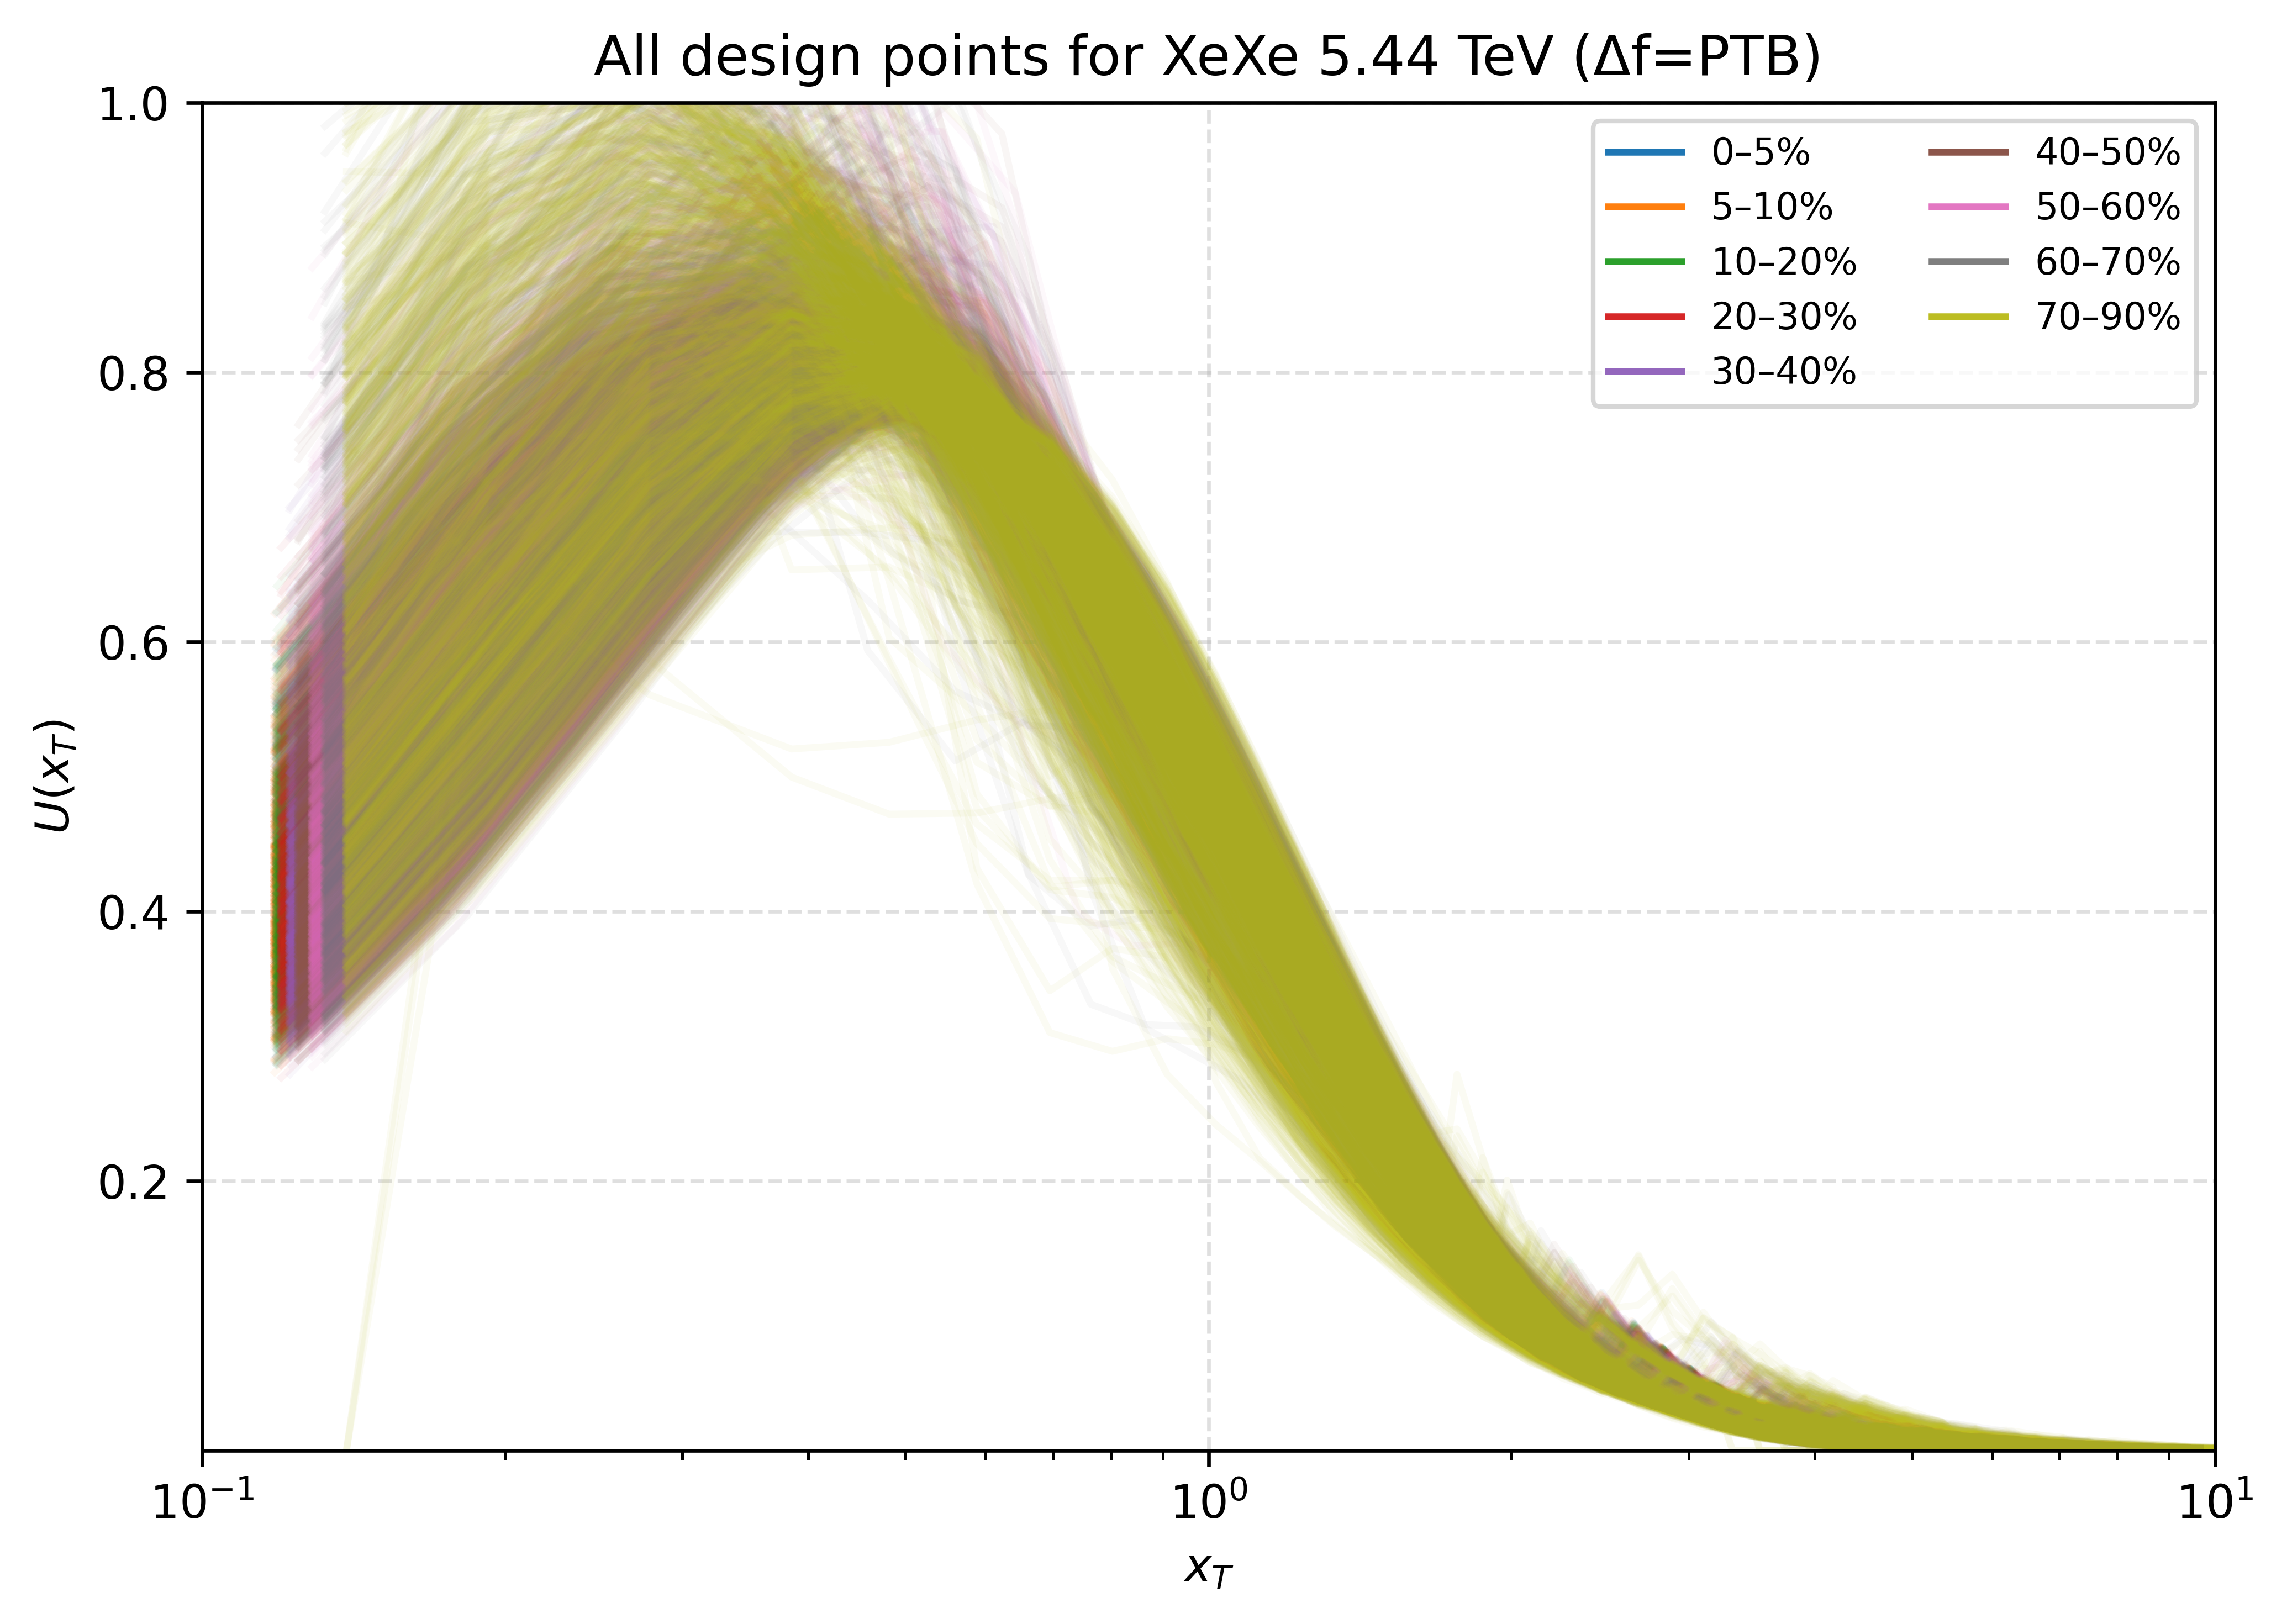

In [3]:
if __name__ == "__main__":
    DF = 3
    BASE_DIR = "universal_xexe/universal"

    # 1) One PDF per centrality, overlaying all design points:
#    plot_all_design_points_by_centrality(
#        df       = DF,
#        base_dir = BASE_DIR,
#        xt_fname = "xt_jestcape.dat",
#        options  = {
#            "dpi": 600,
#            "figsize": (5, 4),
#            "alpha": 0.1,
#            "color": "blue",
#            "log_scale": True,
#            "xlim": (0.1, 10),
#            "ylim": (1e-4, 2.0),
#            "save_folder": f"figures/df{DF}/by_centrality"
#        }
#    )

    # 2) Single “overlay” PDF, all centralities & all design points:
    plot_all_design_points_overlay(
        df       = DF,
        base_dir = BASE_DIR,
        xt_fname = "xt_jestcape.dat",
        options  = {
            "dpi": 600,
            "figsize": (7, 5),
            "alpha": 0.05,
            "colormap": plt.get_cmap("tab10"),
            "log_scale": True,
            "xlim": (0.1, 10),
            "ylim": (1e-4, 1.0),
            "save_path": f"figures/df{DF}/overlay_df{DF}.pdf"
        }
    )

### Plotting experimental data

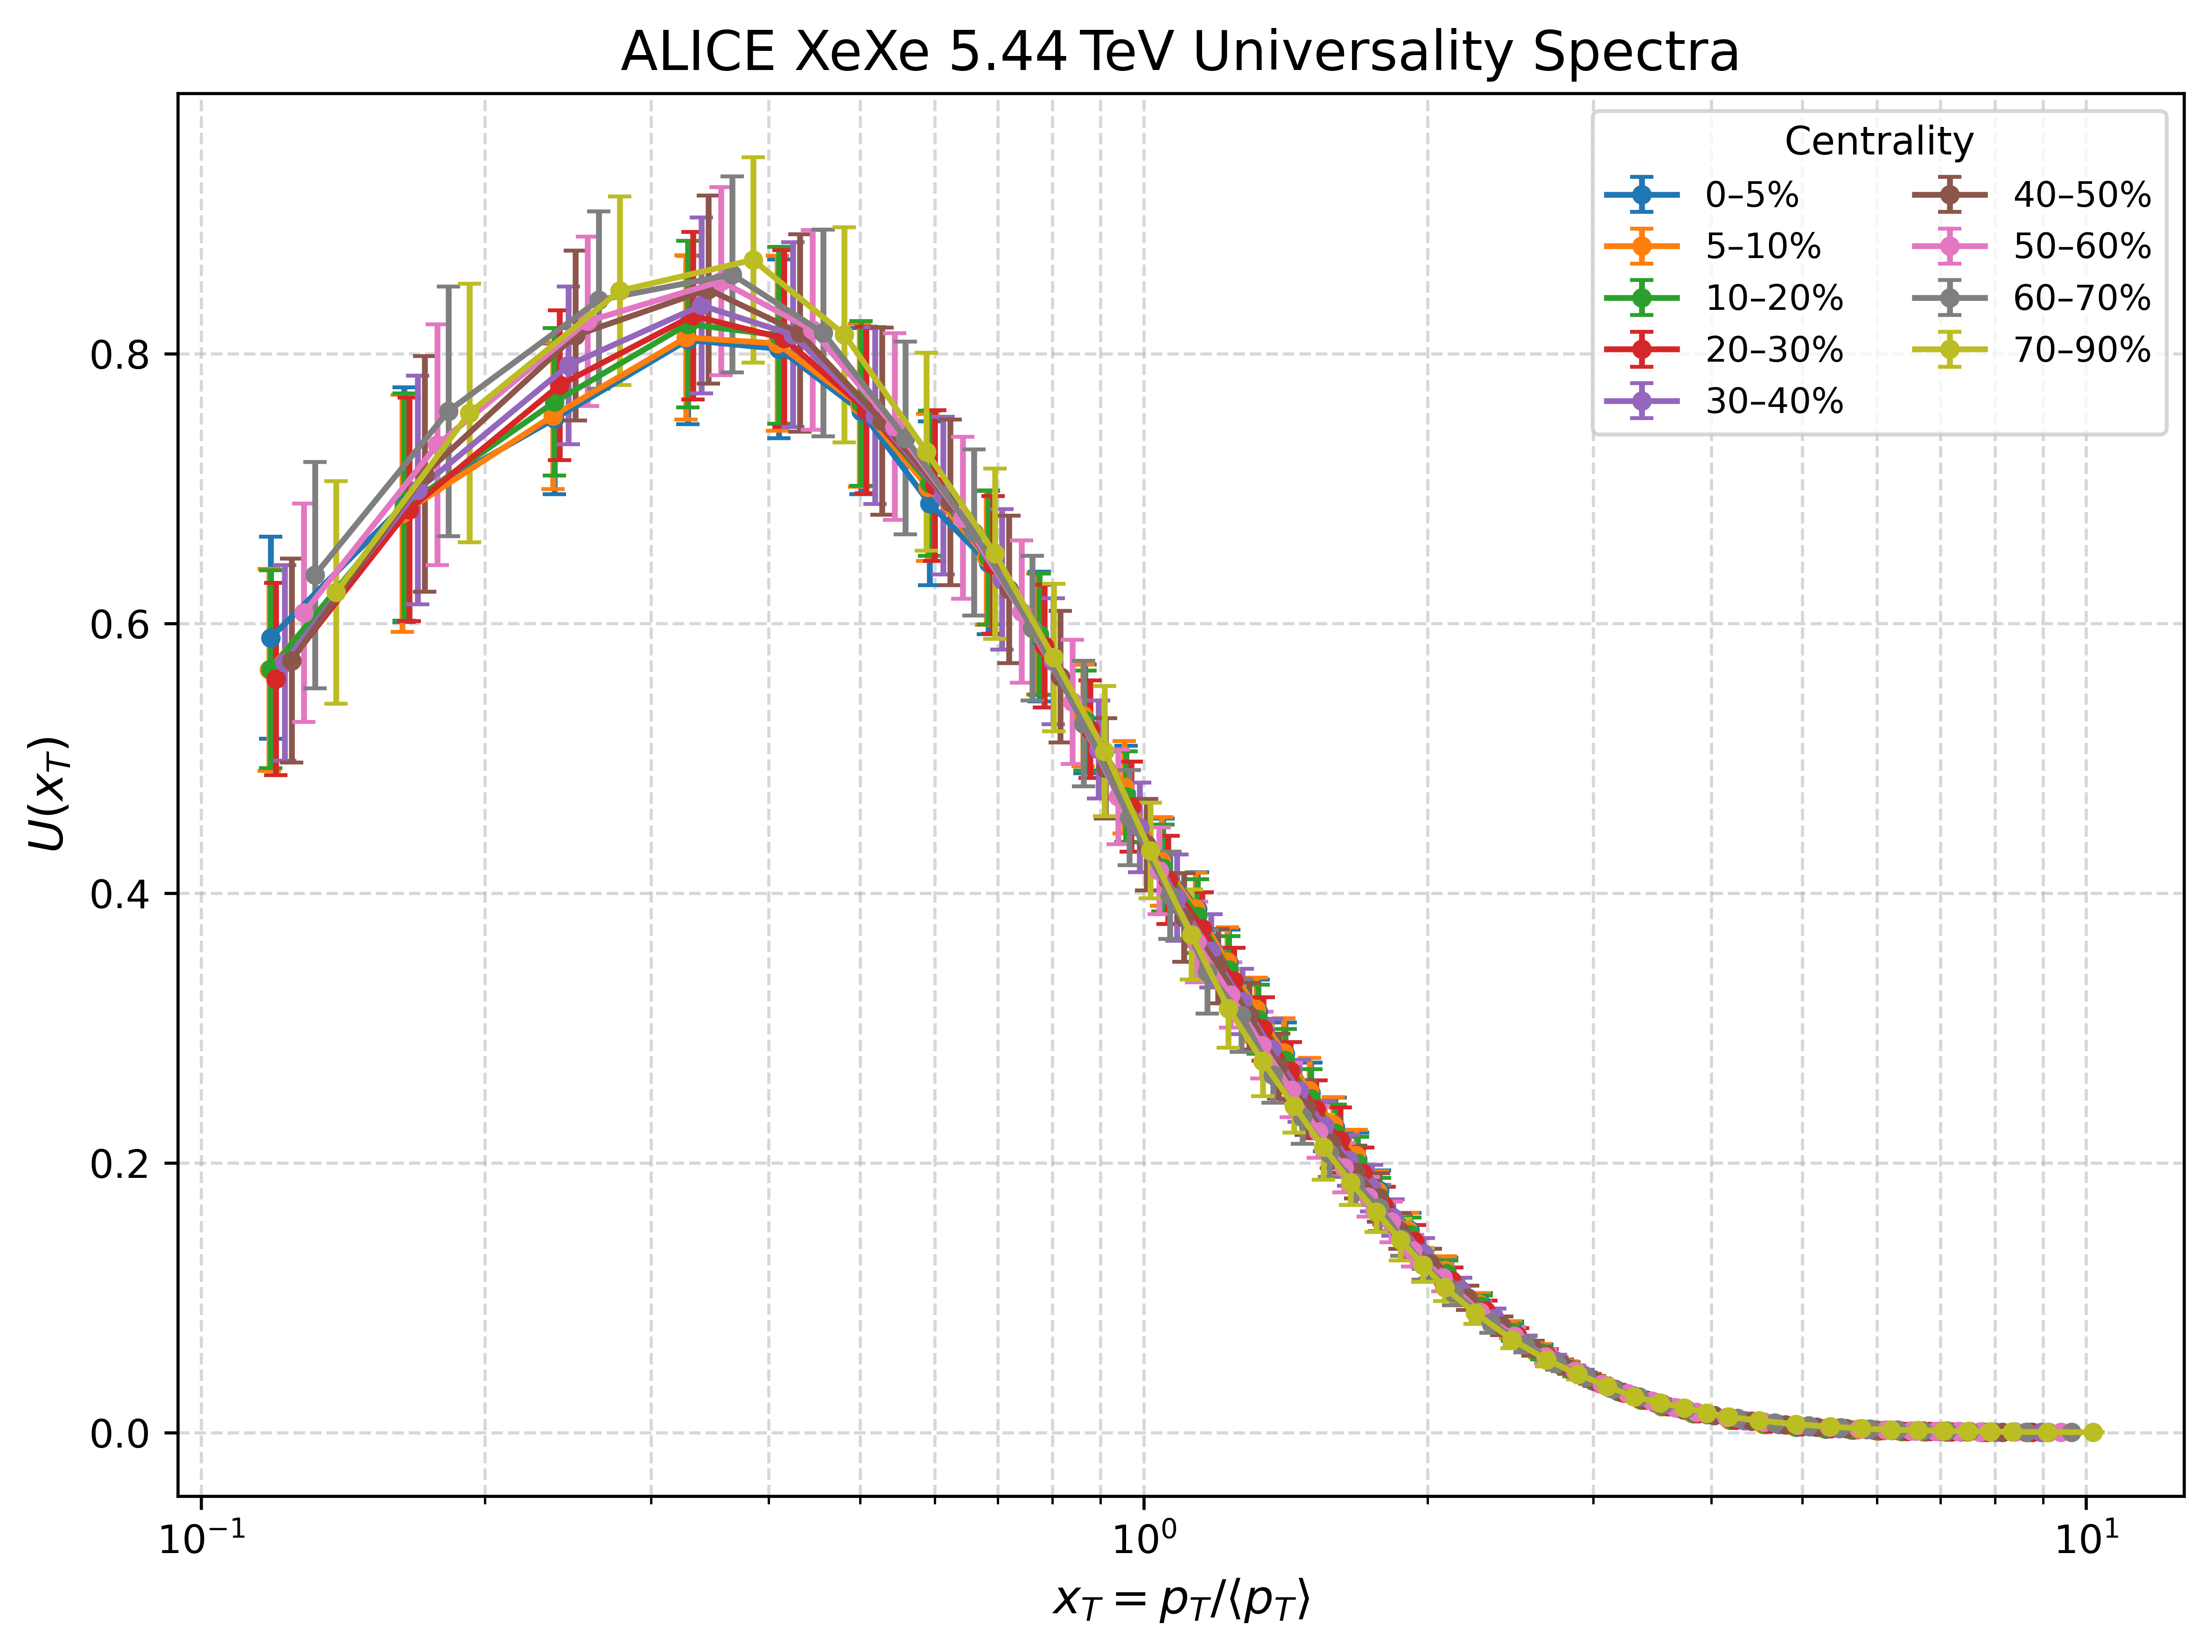

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Load the data, skipping the header line
path = 'ALICE_XeXe5440.dat'
# file format: centrality_index  xT  U(xT)  uncertainty
data = np.genfromtxt(path, comments='#', skip_header=1)

# 2) Define human-readable labels for each centrality index
centrality_labels = [
    '0–5%', '5–10%', '10–20%', '20–30%', '30–40%', 
    '40–50%', '50–60%', '60–70%', '70–90%'
]

# 3) Make the plot
plt.figure(figsize=(8,6), dpi=600)

for cent_idx in np.unique(data[:,0].astype(int)):
    mask = data[:,0] == cent_idx
    xT  = data[mask, 1]
    U   = data[mask, 2]
    err = data[mask, 3]
    plt.errorbar(
        xT, U, yerr=err,
        fmt='o-', capsize=3, markersize=4,
        label=centrality_labels[cent_idx]
    )

# 4) Final formatting
plt.xscale('log')
plt.xlabel(r'$x_T = p_T / \langle p_T\rangle$', fontsize=12)
plt.ylabel(r'$U(x_T)$', fontsize=12)
plt.title('ALICE XeXe 5.44 TeV Universality Spectra', fontsize=14)
plt.legend(title='Centrality', fontsize=9, ncol=2)
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Design points vs. experimental: for all 4 viscous corrections

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Plotting data 
df_name = {0: "Grad", 1: "CE", 2: "PTM", 3: "PTB"}

# -----------------------------------------------------------------------------
# 1) loaders
# -----------------------------------------------------------------------------
def load_design_point_spectra(df, base_dir="universal_xexe/universal", xt_fname="xt_jestcape.dat"):
    """
    Returns:
      spectra: dict dp -> array shape (n_cent, n_xt)
      xt_bins: array shape (n_cent, n_xt)
    """
    # load common xT grid
    xt_path = os.path.join(base_dir, xt_fname)
    xt_bins = np.loadtxt(xt_path, comments="#")  # shape (n_cent, n_xt)

    spectra = {}
    for fname in sorted(os.listdir(base_dir)):
        if fname.startswith("universal_dp") and f"_df{df}.txt" in fname:
            dp = int(fname.split("dp")[1].split("_")[0])
            arr = np.loadtxt(os.path.join(base_dir, fname), comments="#")
            spectra[dp] = arr
    return spectra, xt_bins

def load_alice_xexe(path="/mnt/data/ALICE_XeXe5440.dat"):
    """
    Returns:
      exp_xT: list of arrays, one per centrality
      exp_U:  list of arrays, one per centrality
      exp_err:list of arrays, one per centrality
    Assumes columns: cent_idx, xT, U, err
    """
    data = np.genfromtxt(path, comments="#", skip_header=1)
    n_cent = int(data[:,0].max())+1
    exp_xT, exp_U, exp_err = [], [], []
    for cent in range(n_cent):
        m = data[:,0].astype(int)==cent
        exp_xT .append(data[m,1])
        exp_U  .append(data[m,2])
        exp_err.append(data[m,3])
    return exp_xT, exp_U, exp_err

# -----------------------------------------------------------------------------
# 2) by‐centrality (one plot per cent)
# -----------------------------------------------------------------------------
def plot_all_design_by_centrality_with_exp(
    df,
    base_dir="universal_xexe/universal",
    xt_fname="xt_jestcape.dat",
    alice_path="/mnt/data/ALICE_XeXe5440.dat",
    save_folder="figs/by_centrality",
    dpi=150,
    figsize=(4,3)
):
    os.makedirs(save_folder, exist_ok=True)

    # load everything
    spectra, xt_bins = load_design_point_spectra(df, base_dir, xt_fname)
    exp_xT, exp_U, exp_err = load_alice_xexe(alice_path)

    # one figure per centrality
    n_cent = xt_bins.shape[0]
    for cent in range(n_cent):
        plt.figure(figsize=figsize, dpi=dpi)
        # all design‐points in gray
        for dp, arr in spectra.items():
            plt.plot(xt_bins[cent], arr[cent],
                     color="gray", alpha=0.2, linewidth=0.5)

        # overlay ALICE
        plt.errorbar(
            exp_xT[cent], exp_U[cent], yerr=exp_err[cent],
            fmt='o', color='black', capsize=3, label="ALICE XeXe 5.44 TeV"
        )

        plt.xscale('log')
        plt.xlabel(r'$x_T$')
        plt.ylabel(r'$U(x_T)$')
        plt.title(f'Centrality {cent*10:.0f}–{min(cent*10+10,90)}% (df={df})')
        plt.grid(True, ls='--', alpha=0.4)
        plt.legend(fontsize=8)
        plt.tight_layout()

        out = os.path.join(save_folder, f"dp_all_df{df}_cent{cent}.pdf")
        plt.savefig(out, bbox_inches='tight')
        plt.close()

# -----------------------------------------------------------------------------
# 3) overlay all centralities + experimental
# -----------------------------------------------------------------------------
def plot_all_design_overlay_with_exp(
    df,
    base_dir="universal_xexe/universal",
    xt_fname="xt_jestcape.dat",
    alice_path="/mnt/data/ALICE_XeXe5440.dat",
    save_path="figs/overlay_df{df}.pdf",
    dpi=150,
    figsize=(6,5)
):
    os.makedirs(os.path.dirname(save_path), exist_ok=True)

    spectra, xt_bins = load_design_point_spectra(df, base_dir, xt_fname)
    exp_xT, exp_U, exp_err = load_alice_xexe(alice_path)

    cmap = plt.get_cmap('tab10')
    n_cent = xt_bins.shape[0]

    plt.figure(figsize=figsize, dpi=dpi)

    # design‐points
    for cent in range(n_cent):
        for dp, arr in spectra.items():
            plt.plot(xt_bins[cent], arr[cent],
                     color=cmap(cent), alpha=0.5, linewidth=0.5)

    # experimental on top
    for cent in range(n_cent):
        plt.errorbar(
            exp_xT[cent], exp_U[cent], yerr=exp_err[cent],
            fmt='o', markersize=4,
            color=cmap(cent), capsize=2,
            label=f"{cent*10:.0f}–{min(cent*10+10,90)}%"
        )

    plt.xscale('log')
    plt.xlabel(r'$x_T$')
    plt.ylabel(r'$U(x_T)$')
    plt.title(f'All Centralities Overlay (df={df})')
    plt.grid(True, ls='--', alpha=0.4)
    plt.legend(ncol=2, fontsize=8)
    plt.tight_layout()

    out = save_path.format(df=df)
    plt.savefig(out, bbox_inches='tight')
    plt.close()

# -----------------------------------------------------------------------------
# 4) usage example
# -----------------------------------------------------------------------------
if __name__=="__main__":
    DF = 0
    BASE_DIR = "universal_xexe/universal"
    # 3×3 = 9 centrality plots
#    plot_all_design_by_centrality_with_exp(
#        df=DF,
#        base_dir=BASE_DIR,
#        xt_fname="xt_jetscape.dat",
#        alice_path="/mnt/data/ALICE_XeXe5440.dat",
#        save_folder=f"figures/df{DF}/by_centrality"
#    )
    # one overlay figure
    plot_all_design_overlay_with_exp(
        df=DF,
        base_dir=BASE_DIR,
        xt_fname="xt_jestcape.dat",
        alice_path="ALICE_XeXe5440.dat",
        save_path=f"figures/{df_name[DF]}/overlay_dp_with_exp_{df_name[DF]}.pdf"
    )

### Universality ratio: design points vs. experimental data

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# --- 0) your experimental universality data ------------------------------
centrality_classes = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60-70','70-0']

xT=[[0.11854608,0.16414072,0.23709216,0.32828145,0.41035181,0.5015411,0.59273039,0.68391968,0.77510897,0.86629826,0.95748755,1.04867684,1.13986613,1.23105542,1.32224472,1.41343401,1.5046233,1.59581259,1.68700188,1.77819117,1.91497511,2.09735369,2.27973227,2.46211085,2.64448943,2.82686801,3.00924659,3.19162518,3.37400376,3.55638234,3.82995021,4.19470737,4.55946454,4.9242217,5.28897886,5.65373603,6.01849319,6.38325035,6.74800751,7.11276468,7.75108971,8.66298262],[0.11806161,0.16346992,0.23612322,0.32693984,0.4086748,0.49949143,0.59030805,0.68112467,0.7719413,0.86275792,0.95357454,1.04439117,1.13520779,1.22602441,1.31684103,1.40765766,1.49847428,1.5892909,1.68010753,1.77092415,1.90714908,2.08878233,2.27041558,2.45204882,2.63368207,2.81531532,2.99694856,3.17858181,3.36021505,3.5418483,3.81429817,4.17756466,4.54083115,4.90409765,5.26736414,5.63063063,5.99389712,6.35716362,6.72043011,7.0836966,7.71941296,8.62757919],[0.11854608,0.16414072,0.23709216,0.32828145,0.41035181,0.5015411,0.59273039,0.68391968,0.77510897,0.86629826,0.95748755,1.04867684,1.13986613,1.23105542,1.32224472,1.41343401,1.5046233,1.59581259,1.68700188,1.77819117,1.91497511,2.09735369,2.27973227,2.46211085,2.64448943,2.82686801,3.00924659,3.19162518,3.37400376,3.55638234,3.82995021,4.19470737,4.55946454,4.9242217,5.28897886,5.65373603,6.01849319,6.38325035,6.74800751,7.11276468,7.75108971,8.66298262],[0.12002142,0.1661835,0.24004284,0.33236701,0.41545876,0.50778293,0.6001071,0.69243126,0.78475543,0.8770796,0.96940377,1.06172794,1.15405211,1.24637628,1.33870045,1.43102461,1.52334878,1.61567295,1.70799712,1.80032129,1.93880754,2.12345588,2.30810422,2.49275255,2.67740089,2.86204923,3.04669756,3.2313459,3.41599424,3.60064258,3.87761508,4.24691176,4.61620843,4.98550511,5.35480178,5.72409845,6.09339513,6.4626918,6.83198848,7.20128515,7.84755433,8.77079602],[0.1225652,0.16970565,0.24513039,0.33941131,0.42426414,0.51854506,0.61282598,0.7071069,0.80138782,0.89566873,0.98994965,1.08423057,1.17851149,1.27279241,1.36707333,1.46135425,1.55563517,1.64991609,1.74419701,1.83847793,1.97989931,2.16846115,2.35702299,2.54558482,2.73414666,2.9227085,3.11127034,3.29983218,3.48839402,3.67695586,3.95979862,4.33692229,4.71404597,5.09116965,5.46829333,5.845417,6.22254068,6.59966436,6.97678804,7.35391172,8.01387815,8.95668735],[0.12467871,0.17263206,0.24935743,0.34526413,0.43158016,0.52748686,0.62339356,0.71930026,0.81520697,0.91111367,1.00702037,1.10292707,1.19883377,1.29474048,1.39064718,1.48655388,1.58246058,1.67836728,1.77427399,1.87018069,2.01404074,2.20585415,2.39766755,2.58948095,2.78129436,2.97310776,3.16492116,3.35673457,3.54854797,3.74036138,4.02808148,4.41170829,4.7953351,5.17896191,5.56258871,5.94621552,6.32984233,6.71346914,7.09709595,7.48072275,8.15206967,9.11113669],[0.12855758,0.17800281,0.25711517,0.35600562,0.44500702,0.54389747,0.64278792,0.74167837,0.84056882,0.93945927,1.03834972,1.13724017,1.23613061,1.33502106,1.43391151,1.53280196,1.63169241,1.73058286,1.82947331,1.92836376,2.07669943,2.27448033,2.47226123,2.67004213,2.86782303,3.06560392,3.26338482,3.46116572,3.65894662,3.85672752,4.15339886,4.54896066,4.94452246,5.34008425,5.73564605,6.13120785,6.52676964,6.92233144,7.31789324,7.71345503,8.40568818,9.39459267],[0.13207892,0.18287851,0.26415784,0.36575702,0.45719627,0.55879544,0.66039461,0.76199378,0.86359295,0.96519212,1.06679129,1.16839047,1.26998964,1.37158881,1.47318798,1.57478715,1.67638632,1.77798549,1.87958466,1.98118383,2.13358259,2.33678093,2.53997927,2.74317762,2.94637596,3.1495743,3.35277264,3.55597098,3.75916933,3.96236767,4.26716518,4.67356186,5.07995855,5.48635523,5.89275192,6.2991486,6.70554528,7.11194197,7.51833865,7.92473533,8.63592953,9.65192124],[0.1390642,0.19255044,0.27812841,0.38510088,0.48137609,0.58834856,0.69532102,0.80229349,0.90926595,1.01623842,1.12321089,1.23018335,1.33715582,1.44412828,1.55110075,1.65807321,1.76504568,1.87201814,1.97899061,2.08596307,2.24642177,2.4603667,2.67431163,2.88825656,3.10220149,3.31614642,3.53009135,3.74403629,3.95798122,4.17192615,4.49284354,4.9207334,5.34862326,5.77651313,6.20440299,6.63229285,7.06018271,7.48807257,7.91596243,8.34385229,9.09265955,10.1623842]]
U_xT_ratios=[[1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.],[0.96365018,0.99278851,1.00407315,1.00322779,1.00489072,1.00444275,1.01467908,1.00363821,1.00003505,1.00045731,1.00536581,0.99534507,0.9963222,0.9965888,0.99742649,0.99546369,0.99927242,0.99960424,1.00393625,0.98649016,0.98971005,0.99677875,0.98748513,0.99234498,0.99384066,0.99714672,0.99771655,1.00528856,0.99742867,0.97275281,0.9965046,1.00024722,0.99986197,1.00469462,1.02944618,1.02971077,1.02814409,1.0764347,1.05031332,1.00604507,1.07801701,1.05978164],[0.96046153,0.99742071,1.01653074,1.01447502,1.01250559,1.00767778,1.02167879,1.00609358,1.00300018,0.99766918,0.9960123,0.9899564,0.98665602,0.98553472,0.98142045,0.98316008,0.98333639,0.98006531,0.98389293,0.97267458,0.98055321,0.98646483,0.98356227,0.97858983,0.98202821,0.98513532,1.00161944,0.99491128,1.00668076,1.00604921,1.02155555,1.04176377,1.05366684,1.06801151,1.09602455,1.08281409,1.12932645,1.1788687,1.11595276,1.13332787,1.47652487,1.28851238],[0.94273212,0.99244309,1.03050348,1.02261435,1.01285922,1.00735197,1.02455108,1.00540921,0.99914867,0.99772707,0.9937656,0.98031616,0.97805068,0.97841267,0.97571841,0.97319461,0.97134383,0.97916665,0.97437234,0.96317391,0.97184653,0.97272699,0.9771531,0.97446274,0.98106067,0.99198248,1.0006266,1.01299713,1.04444841,1.03551907,1.03562815,1.06938399,1.10275694,1.13994019,1.16119354,1.18921671,1.23518279,1.23792105,1.27914018,1.33917326,1.40499502,1.47778429],[0.95430659,1.00882733,1.04555736,1.03273654,1.02201279,1.01258665,1.0227295,1.00243347,0.9986509,0.99086679,0.98505945,0.96858576,0.96188758,0.96376223,0.95753696,0.95376413,0.95603277,0.9502347,0.96316116,0.95764122,0.95353773,0.96046046,0.97201154,0.9657129,0.98037818,1.00149258,0.99901123,1.03633839,1.03848235,1.06014455,1.0782652,1.1079552,1.16470484,1.25060033,1.28823633,1.33650762,1.37973604,1.4308985,1.49740224,1.53113369,1.58970627,1.987282],[0.94975381,1.02222587,1.07084545,1.04798411,1.02855504,1.01638963,1.02316789,1.00235902,0.99484754,0.98148264,0.97729442,0.94952836,0.95430184,0.95554067,0.94114869,0.93494464,0.93325327,0.94218137,0.96638129,0.93516979,0.9381718,0.95063273,0.9566834,0.96058443,0.97511374,0.99297343,1.01950063,1.0292356,1.08273629,1.06501331,1.10081714,1.14349169,1.20671158,1.29622119,1.34533582,1.47518214,1.55489627,1.55350315,1.71692445,1.68890635,1.6900223,2.61741254],[0.99492531,1.04626294,1.07776854,1.05666326,1.04025074,1.0281287,1.01999977,0.99738686,0.99150768,0.97295824,0.97142437,0.93449059,0.93704743,0.93292836,0.92547215,0.91330342,0.90457747,0.91247503,0.92821141,0.91314854,0.93445423,0.93009207,0.95559822,0.96393956,0.99296519,1.00813954,1.04006857,1.06036224,1.05685084,1.09443267,1.17520567,1.2888383,1.31982659,1.48522891,1.55748628,1.62196506,1.70765461,1.76941582,1.92805538,2.07293889,2.13252824,5.34403668],[1.02784707,1.07528828,1.09182583,1.06394714,1.0455891,1.03224453,1.01697245,0.99714506,0.99002857,0.97206384,0.95718761,0.90932064,0.9288963,0.89771344,0.89209333,0.88935603,0.90218777,0.92843238,0.91084869,0.89665437,0.90587877,0.91166504,0.9442001,0.95474798,0.98497807,1.01000281,1.05911034,1.05375059,1.12973026,1.14813752,1.23756088,1.28019384,1.48150725,1.57066537,1.66217266,1.76920684,1.98429047,2.27417153,2.08936899,2.44475326,2.47963983,56.34684035],[0.98303257,1.06051823,1.0882447,1.07940096,1.06052629,1.05056609,1.02114839,1.0046807,1.00440495,0.97877464,0.9360454,0.90208716,0.89604741,0.89283367,0.88498885,0.88234222,0.89600153,0.89771506,0.89189667,0.88648664,0.89039524,0.90586777,0.92714144,0.96815668,1.00283342,1.00954863,1.0983653,1.15682445,1.17026809,1.22271189,1.32285919,1.49559295,1.66168498,1.73162013,1.79726756,2.13270621,2.20358311,2.54542194,2.64582872,2.52270593,3.97555265,-2.62137955]]
U_xT_ratios_uncertainties=[[0.12716654,0.12647125,0.07430121,0.07716553,0.08242318,0.08152956,0.08819219,0.0823909,0.08160295,0.07593528,0.07593838,0.07645139,0.07080077,0.07143184,0.07523632,0.08305763,0.08943049,0.09585231,0.09629769,0.08440413,0.08573813,0.08582291,0.08514105,0.08476515,0.08459803,0.0860247,0.09166659,0.10053533,0.11182366,0.12488559,0.13208195,0.12942229,0.12220273,0.11808708,0.11978312,0.12386656,0.12648216,0.14324234,0.15636809,0.18306646,0.20373077,0.22892475],[0.12755124,0.12799015,0.07243718,0.07521111,0.08075497,0.0796784,0.07894968,0.07691912,0.07592413,0.07078457,0.0720564,0.07720224,0.06857978,0.07302104,0.07499753,0.09010993,0.0950069,0.08961076,0.09284168,0.0815821,0.08317653,0.08385974,0.08240103,0.08243771,0.08240491,0.08415234,0.08989958,0.09957888,0.11032035,0.12038181,0.13040033,0.1283779,0.12108486,0.11756092,0.12234311,0.12657424,0.12917361,0.15330315,0.16348864,0.18367377,0.21904418,0.24249074],[0.124662,0.12251057,0.07273144,0.07603876,0.08159553,0.08058798,0.07798483,0.07694881,0.0763833,0.06973506,0.07072103,0.07597387,0.07008093,0.071463,0.08202991,0.08170139,0.08611848,0.09381168,0.09706596,0.08035262,0.08232522,0.0829124,0.08198429,0.08119798,0.08133403,0.08302443,0.09018291,0.09849336,0.11124254,0.12432203,0.13360142,0.13378374,0.12748022,0.12476161,0.1299368,0.13284051,0.14150219,0.16758367,0.17312928,0.20627954,0.29956057,0.29367813],[0.12032846,0.119988,0.07374137,0.07670451,0.08181314,0.08215161,0.08137531,0.07950637,0.07796436,0.06917299,0.0715084,0.07832862,0.07056631,0.07233955,0.07667704,0.07913933,0.08671125,0.1096416,0.09603231,0.08006394,0.08207508,0.08224168,0.08195278,0.08136879,0.08175893,0.08410894,0.09056149,0.10079523,0.11587169,0.1283041,0.13574027,0.13773503,0.13386989,0.13375923,0.13828341,0.14652356,0.15544695,0.17658545,0.19917476,0.24457241,0.28557411,0.33744238],[0.12130092,0.12245554,0.07737414,0.08049031,0.08608544,0.08802685,0.08596839,0.08251261,0.08152516,0.07122842,0.07326001,0.07831964,0.0732005,0.07291192,0.07624023,0.08641818,0.07903872,0.08868861,0.09173413,0.08142472,0.08229168,0.08298695,0.08335154,0.08247053,0.08360798,0.08682768,0.09226186,0.10476208,0.11677555,0.1329449,0.14272386,0.14410455,0.14303533,0.14858425,0.15533624,0.1667459,0.17590908,0.20636456,0.23511825,0.28168037,0.324861,0.45672786],[0.12558592,0.12584577,0.08289258,0.08624947,0.09241142,0.09392797,0.09110509,0.08769657,0.0867414,0.07411415,0.07576185,0.08150324,0.07595042,0.07686886,0.08352854,0.07819923,0.08118415,0.09537797,0.10031362,0.08231464,0.08370713,0.08492789,0.08487654,0.08490563,0.08608377,0.08903591,0.09695386,0.10689456,0.1243589,0.13579381,0.14800986,0.15103888,0.15089451,0.15709971,0.16550068,0.18767619,0.20212652,0.22779994,0.27392901,0.31482905,0.3483926,0.60663132],[0.13251023,0.12740247,0.08228764,0.08614223,0.09406804,0.09548137,0.09030955,0.08641564,0.08431718,0.07275096,0.07490737,0.07707351,0.07008228,0.08001437,0.07356743,0.07825405,0.08397968,0.07713694,0.08923433,0.0796025,0.08253619,0.08228398,0.08398234,0.08442953,0.0869091,0.08976643,0.09842281,0.10957951,0.12094148,0.13934885,0.1575589,0.16938059,0.1647017,0.1798087,0.19201624,0.20668032,0.22289271,0.26105685,0.31018951,0.38921533,0.440716,1.24474358],[0.13565429,0.13141889,0.08558746,0.0900417,0.09844445,0.10002245,0.09384113,0.0896258,0.08785099,0.07513401,0.07773839,0.08275975,0.08136963,0.06972553,0.0742202,0.07415666,0.08115572,0.09530383,0.07911742,0.07987425,0.08160759,0.08230538,0.08475731,0.08551916,0.08822425,0.0919959,0.1022096,0.11084298,0.13156967,0.14854742,0.1678526,0.17130938,0.18796322,0.19399203,0.20929673,0.2306225,0.26685016,0.34537378,0.34574289,0.47033872,0.51990885,13.37767625],[0.13042185,0.1343588,0.08967678,0.09461081,0.10388804,0.10619375,0.09901771,0.09561492,0.09591803,0.0801464,0.08443358,0.08290666,0.08464918,0.072145,0.10061727,0.07905987,0.08192886,0.09720332,0.09071911,0.08166288,0.08279291,0.08444133,0.08603217,0.08975513,0.09303276,0.09525768,0.10971815,0.12524114,0.13978416,0.16107049,0.18243903,0.2033456,0.21542588,0.21945846,0.23189327,0.28726695,0.30598382,0.39776475,0.44936943,0.50072724,0.85080276,0.64088883]]

xT_arr = [np.array(xx) for xx in xT]
ratios_arr = [np.array(r) for r in U_xT_ratios]
unc_arr    = [np.array(e) for e in U_xT_ratios_uncertainties]

# --- 1) load Jetscape design points ----------------------------------------
def load_jetscape(df, base_dir="universal_xexe/universal", xt_fname="xt_jestcape.dat"):
    """
    Returns:
      spectra: dict dp -> shape (n_cent, n_xt)
      xt_bins: array (n_cent, n_xt)
    """
    xt_bins = np.loadtxt(os.path.join(base_dir, xt_fname), comments="#")
    spec = {}
    for fn in sorted(os.listdir(base_dir)):
        if fn.startswith(f"universal_dp") and f"_df{df}.txt" in fn:
            dp = int(fn.split("dp")[1].split("_")[0])
            spec[dp] = np.loadtxt(os.path.join(base_dir, fn), comments="#")
    return spec, xt_bins

# --- 2) compute design‐point ratios on ref grid -----------------------------
def compute_univ_ratios(spectra, xt_bins):
    """
    Given:
      spectra[dp]: array (n_cent, n_xt)
      xt_bins:     array (n_cent, n_xt)
    Returns:
      design_ratios: dict dp -> array (n_cent, n_ref_xt)
      xT_ref: array shape (n_ref_xt)
    where n_ref_xt = xt_bins[0].size.
    """
    dp_ratios = {}
    xT_ref = xt_bins[0]
    for dp, arr in spectra.items():
        n_cent, _ = arr.shape
        R = np.zeros((n_cent, xT_ref.size))
        f_ref = interp1d(xT_ref, arr[0], kind="linear", fill_value="extrapolate")
        for c in range(n_cent):
            f_c = interp1d(xt_bins[c], arr[c], kind="linear", fill_value="extrapolate")
            R[c] = f_c(xT_ref) / f_ref(xT_ref)
        dp_ratios[dp] = R
    return dp_ratios, xT_ref

# --- 3a) panel per centrality with exp data -------------------------------
def plot_univ_by_centrality(
    df,
    base_dir="universal_xexe/universal",
    save_folder="figs/univ_by_cent",
):
    os.makedirs(save_folder, exist_ok=True)
    spectra, xt_bins = load_jetscape(df, base_dir)
    dp_ratios, xT_ref = compute_univ_ratios(spectra, xt_bins)

    for cent in range(1, len(centrality_classes)):
        plt.figure(figsize=(4,3), dpi=600)
        # all design points
        for R in dp_ratios.values():
            plt.plot(xT_ref, R[cent], color="gray", alpha=0.2, linewidth=0.5)
        # experimental
        plt.errorbar(
            xT_arr[cent], ratios_arr[cent], yerr=unc_arr[cent],
            fmt='o', color='black', capsize=2, label="ALICE"
        )
        plt.xscale('log')
        plt.ylim(0.5,1.5)
        plt.xlabel(r"$x_T$")
        plt.ylabel(r"$U/U_{0-5\%}$")
        plt.title(f"df={df}, cent={centrality_classes[cent]}")
        plt.grid(True, ls='--', alpha=0.3)
        plt.legend(fontsize=8)
        out = os.path.join(save_folder, f"univ_df{df}_cent{cent}.pdf")
        plt.savefig(out, bbox_inches='tight')
        plt.close()

# --- 3b) single overlay ----------------------------------------------------
def plot_univ_overlay(
    df,
    base_dir="universal_xexe/universal",
    save_path="figures/univ_overlay_df{df}.pdf",
):
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    spectra, xt_bins = load_jetscape(df, base_dir)
    dp_ratios, xT_ref = compute_univ_ratios(spectra, xt_bins)

    cmap = plt.get_cmap('tab10')
    plt.figure(figsize=(6,4), dpi=600)
    # design
    for cent in range(1, len(centrality_classes)):
        for R in dp_ratios.values():
            plt.plot(xT_ref, R[cent], color=cmap(cent), alpha=0.5, linewidth=0.5)
    # experimental
    for cent in range(1, len(centrality_classes)):
        plt.errorbar(
            xT_arr[cent], ratios_arr[cent], yerr=unc_arr[cent],
            fmt='o', color=cmap(cent), capsize=2,
            label=centrality_classes[cent]
        )

    plt.xscale('log')
    plt.ylim(0.5,2)
    plt.xlabel(r"$x_T$")
    plt.ylabel(r"$U/U_{0-5\%}$")
    plt.title(f"Universality Ratio Overlay (df={df})")
    plt.grid(True, ls='--', alpha=0.3)
    plt.legend(ncol=2, fontsize=8)
    out = save_path.format(df=df)
    plt.savefig(out, bbox_inches='tight')
    plt.close()

# --- 4) usage --------------------------------------------------------------
if __name__=="__main__":
    DF = 3
#    plot_univ_by_centrality(DF)
    plot_univ_overlay(DF)

/tmp/ipykernel_2849/2303474693.py:51: RuntimeWarning: invalid value encountered in divide
  R[c] = f_c(xT_ref) / f_ref(xT_ref)
/tmp/ipykernel_2849/2303474693.py:51: RuntimeWarning: divide by zero encountered in divide
  R[c] = f_c(xT_ref) / f_ref(xT_ref)
/tmp/ipykernel_2849/2303474693.py:118: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(out, bbox_inches='tight')
/tmp/ipykernel_2849/2303474693.py:118: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(out, bbox_inches='tight')


### Bayesian pipeline

In [1]:
import os
import pickle
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import lapack
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel as C
import ptemcee
import seaborn as sns
from SALib.sample import saltelli
from SALib.analyze import sobol
np.float = float  # Fix deprecated alias for ptemcee

# -------------------------------
# Plot Decorator & Saving Helpers
# -------------------------------
def plot(func):
    """Decorator to display and return the figure."""
    def wrapper(*args, **kwargs):
        fig = func(*args, **kwargs)
        plt.show()
        return fig
    return wrapper

# -------------------------------
# Function to save in a pre-defined directory
# -------------------------------

def make_save_dir(main_folder, visc_corr_label, subfolder):
    path = os.path.join(main_folder, f"{visc_corr_label}", subfolder)
    os.makedirs(path, exist_ok=True)
    return path

def save_fig(fig, filename, folder, dpi=600):
    full_path = os.path.join(folder, filename)
    fig.savefig(full_path, format='pdf', dpi=dpi, bbox_inches='tight')
    plt.close(fig)

# -------------------------------
# Global Definitions for Labels & Colors
# -------------------------------
exp_centrality_labels = ["0-5%", "5-10%", "10-20%", "20-30%", "30-40%", 
                         "40-50%", "50-60%", "60-70%", "70-90%"]
exp_markers = ['o', 's', '^', 'D', 'v', '<', '>', 'v', '*']
idf_label_short = {0: 'Grad', 1: 'CE', 2: 'PTM', 3: 'PTB'}
color_map = {0: 'blue', 1: 'red', 2: 'magenta', 3: 'green'}

# Model parameter names in Latex compatble form
model_param_dsgn = ['$N$[$2.76$TeV]',
 '$p$',
 '$\\sigma_k$',
 '$w$ [fm]',
 '$d_{\\mathrm{min}}$ [fm]',
 '$\\tau_R$ [fm/$c$]',
 '$\\alpha$',
 '$T_{\\eta,\\mathrm{kink}}$ [GeV]',
 '$a_{\\eta,\\mathrm{low}}$ [GeV${}^{-1}$]',
 '$a_{\\eta,\\mathrm{high}}$ [GeV${}^{-1}$]',
 '$(\\eta/s)_{\\mathrm{kink}}$',
 '$(\\zeta/s)_{\\max}$',
 '$T_{\\zeta,c}$ [GeV]',
 '$w_{\\zeta}$ [GeV]',
 '$\\lambda_{\\zeta}$',
 '$b_{\\pi}$',
 '$T_{\\mathrm{sw}}$ [GeV]']
    
# -------------------------------
# Data Loading Functions
# -------------------------------

# --- 1) Load Xe-Xe-5440 1,000 design points ----------------------------------------
def load_spectra_data(df, base_dir="universal_xexe/universal", xt_fname="xt_jestcape.dat"):
    """
    Returns:
      spectra: dict dp -> shape (n_cent, n_xt)
      xt_bins: array (n_cent, n_xt)
    """
    xt_bins = np.loadtxt(os.path.join(base_dir, xt_fname), comments="#")
    spec = {}
    #these are the problematic design points for Xe Xe 5440 w/ 1000 design points
#    nan_design_pts_set_Xe = set([354, 494, 601, 682, 699, 719, 736, 758, 768, 770, 834, 902, 908, 949])
#    unfinished_design_pts_set_Xe = set([328, 354, 562, 672, 682, 736, 818, 897, 902])
#    delete_design_pts_set_Xe = nan_design_pts_set_Xe.union(unfinished_design_pts_set_Xe)
    
    for fn in sorted(os.listdir(base_dir)):
        if fn.startswith(f"universal_dp") and f"_df{df}.txt" in fn:
            dp = int(fn.split("dp")[1].split("_")[0])
            # to remove problematic design points
            # if dp in delete_design_pts_set_Xe:
            #    continue
            spec[dp] = np.loadtxt(os.path.join(base_dir, fn), comments="#")
    return spec, xt_bins

# --- Load ALICE Xe-Xe-5440 experimental data  ----------------------------------------
def load_alice_xexe(path="ALICE_XeXe5440.dat"):
    """
    Returns:
      exp_xT: list of arrays, one per centrality
      exp_U:  list of arrays, one per centrality
      exp_err:list of arrays, one per centrality
    Assumes columns: cent_idx, xT, U, err
    """
    data = np.genfromtxt(path, comments="#", skip_header=1)
    n_cent = int(data[:,0].max())+1
    exp_xT, exp_U, exp_err = [], [], []
    for cent in range(n_cent):
        m = data[:,0].astype(int)==cent
        exp_xT .append(data[m,1])
        exp_U  .append(data[m,2])
        exp_err.append(data[m,3])
    return exp_xT, exp_U, exp_err

# --- Load ALICE Xe-Xe-5440 design points ----------------------------------------
#def load_design(idf):
    
    # these are the problematic design points for Xe Xe 5440 w/ 1000 design points
#    nan_design_pts_set_Xe = set([354, 494, 601, 682, 699, 719, 736, 758, 768, 770, 834, 902, 908, 949])
#    unfinished_design_pts_set_Xe = set([328, 354, 562, 672, 682, 736, 818, 897, 902])
#    delete_design_pts_set_Xe = nan_design_pts_set_Xe.union(unfinished_design_pts_set_Xe)
    
#    design = pd.read_csv('design_pts_Xe_Xe_5440_production/design_points_main_XeXe-5440.dat', index_col=0)
#    design =  design.drop(labels=list(delete_design_pts_set_Xe), errors='ignore')
#    labels = design.keys()    
#    data_path = 'design_pts_Xe_Xe_5440_production/design_ranges_main_XeXe-5440.dat'    
#    design_range = pd.read_csv(data_path, index_col=0)
#    design_max = design_range['max'].values
#    design_min = design_range['min'].values
#    return design, labels, design_max, design_min

def load_design(idf, base_dir="universal_xexe/universal", xt_fname="xt_jestcape.dat"):
    """
    Load the design points for Xe-Xe 5.44 TeV, removing only the ones that
    do not have corresponding spectra from load_spectra_data.
    """
    # Load all design points
    design_path = 'design_pts_Xe_Xe_5440_production/design_points_main_XeXe-5440.dat'
    design = pd.read_csv(design_path, index_col=0)

    # Load spectra to know which design points are valid
    spectra, _ = load_spectra_data(idf, base_dir=base_dir, xt_fname=xt_fname)
    valid_dps = set(spectra.keys())

    # Keep only rows whose index matches available spectra
    design = design.loc[design.index.intersection(valid_dps)]

    # Load design ranges for min/max
    range_path = 'design_pts_Xe_Xe_5440_production/design_ranges_main_XeXe-5440.dat'
    design_range = pd.read_csv(range_path, index_col=0)
    design_max = design_range['max'].values
    design_min = design_range['min'].values
    labels = design.keys

    return design, labels, design_max, design_min


# -------------------------------
# All Design points for each viscous correction (All Centralities onto a single plot)
# -------------------------------

@plot
def plot_all_design_overlay_with_exp(
    df,
    save_folder, 
    exp=False
):

    spectra, xt_bins = load_spectra_data(df)
    exp_xT, exp_U, exp_err = load_alice_xexe()

    n_cent = xt_bins.shape[0] # 9 centralities

    fig, ax = plt.subplots(figsize=(10, 6))

    # design‐points: loop over each centrality bin
    for cent in range(n_cent):
        for dp, arr in spectra.items():
            plt.plot(xt_bins[cent], arr[cent],
                     color=color_map[df], alpha=0.2, linewidth=0.5)
        
        # Overlay experimental data for this centrality
        if exp:
            ax.errorbar(exp_xT[cent], exp_U[cent], yerr=exp_err[cent],
                        fmt=exp_markers[cent], color='black', capsize=3, label=f"{exp_centrality_labels[cent]} ALICE Xe-Xe 5.44 TeV.")
    
    ax.set_xlabel(r"$x_T$")
    ax.set_ylabel(r"$U(x_T)$")
    ax.set_xscale("log")
    ax.legend(fontsize=8, loc='upper right', ncol=2, frameon=False)
    ax.set_title(f"All Design Xe-Xe 5.44 TeV - All Centralities ({idf_label_short[df]})")

    plt.tight_layout()
    if exp:
        save_fig(fig, "all_design_exp_scaled_spectra_overlay.pdf", save_folder)
    else:
        save_fig(fig, "all_design_scaled_spectra_overlay.pdf", save_folder)
    return fig

# def prepare_simulation_data(Y):
    # load_spectra_data return a dict dp with shape (n_cent, n_xt)
#    n_design, n_cent, n_xt = Y.shape
#    Y_flat = Y_reduced.reshape(n_design, n_cent * n_xt)
#    return Y_flat

# -------------------------------
# PCA Pipeline Functions
# -------------------------------

# Convert to a 3D array for PCA / training
def spectra_dict_to_array(spectra_dict):
    """
    Convert a dict {dp: (n_cent, n_xt)} into a 3D array of shape (n_dp, n_cent, n_xt)
    """
    dp_list = sorted(spectra_dict.keys())
    sample = spectra_dict[dp_list[0]]
    n_cent, n_xt = sample.shape

    Y = np.zeros((len(dp_list), n_cent, n_xt))
    for i, dp in enumerate(dp_list):
        Y[i] = spectra_dict[dp]

    return Y, dp_list  # dp_list is useful for tracing

# Flatten the 3D array
def prepare_simulation_data(Y_3d):
    """
    Flatten (n_design, n_cent, n_xt) → (n_design, n_cent * n_xt)
    """
    n_design, n_cent, n_xt = Y_3d.shape
    return Y_3d.reshape(n_design, n_cent * n_xt)

def plot_explained_variance(pca, n_pc_to_plot=None):
    explained = pca.explained_variance_ratio_
    if n_pc_to_plot is None:
        n_pc_to_plot = len(explained)
    idx = np.arange(1, n_pc_to_plot+1)
    cumulative = np.cumsum(explained)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.bar(idx, explained[:n_pc_to_plot], color='skyblue')
    ax1.set_xlabel("PC Index")
    ax1.set_ylabel("Explained Variance Ratio")
    ax1.set_title("Variance per PC")
    ax2.bar(idx, cumulative[:n_pc_to_plot], color='lightgreen')
    ax2.set_xlabel("PC Index")
    ax2.set_ylabel("Cumulative Variance")
    ax2.set_title("Cumulative Explained Variance")
    ax2.axhline(0.99, color='r', linestyle='--', label='99% threshold')
    ax2.legend()
    plt.tight_layout()
    plt.show()
    return fig

def fit_pca_model(Y, variance_threshold=0.99, n_components=None):
    scaler = StandardScaler()
    Y_scaled = scaler.fit_transform(Y)
    if n_components is None:
        pca_temp = PCA()
        pca_temp.fit(Y_scaled)
        cumulative_variance = np.cumsum(pca_temp.explained_variance_ratio_)
        n_components = np.searchsorted(cumulative_variance, variance_threshold) + 1
        print(f"Selected n_components: {n_components} to capture at least {variance_threshold*100:.1f}% of variance")
    pca = PCA(n_components=n_components, whiten=False)
    Z = pca.fit_transform(Y_scaled)
    Y_reconstructed = pca.inverse_transform(Z)
    print(f"Original data shape: {Y.shape}")
    print(f"PC-transformed data shape: {Z.shape}")
    return scaler, pca, Z, Y_reconstructed

# -------------------------------
# Emulator Training Functions
# -------------------------------

EMULATOR_FILE = "emulators_Xe_Xe_pcs.pkl"

def train_emulators_for_pcs(idf, pc_tf_data, n_pc_train=6, emulator_output_file=EMULATOR_FILE, train_emulators=False):
    emulator_output_file = f"emulators/emulators_Xe_Xe_{idf_label_short[idf]}_{n_pc_train}_pcs.pkl"
    design, design_labels, design_max, design_min = load_design(idf)
    ptp = design_max - design_min
    if pc_tf_data.shape[1] < n_pc_train:
        raise ValueError("pc_tf_data has fewer components than requested.")
    pc_tf_data_train = pc_tf_data[:, :n_pc_train]
    n_pc = n_pc_train
    if (os.path.exists(emulator_output_file)) and (not train_emulators):
        print("Saved emulators exist; loading them.")
        with open(emulator_output_file, "rb") as f:
            Emulators = pickle.load(f)
    else:
        Emulators = []
        for i in range(n_pc):
            start_time = time.time()
            kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=ptp,
                        length_scale_bounds=np.outer(ptp, (0.4, 1e2))) + WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-2, 1e2))
            gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=4, alpha=1e-10)
            gpr.fit(design.values, pc_tf_data_train[:, i].reshape(-1, 1))
            score = gpr.score(design.values, pc_tf_data_train[:, i].reshape(-1, 1))
            print(f"Trained emulator for PC {i+1}/{n_pc} with score {score:.3f} in {time.time()-start_time:.2f} s.")
            Emulators.append(gpr)
        with open(emulator_output_file, "wb") as f:
            pickle.dump(Emulators, f)
    return Emulators

def predict_observables(model_parameters, Emulators, inverse_tf_matrix, SS):
    model_parameters = np.array(model_parameters).flatten()
    if model_parameters.shape[0] != 17:
        raise ValueError("Input model parameters must be a 17-dimensional array.")
    theta = model_parameters.reshape(1, -1)
    n_pc = len(Emulators)
    pc_means = []
    pc_vars = []
    for emulator in Emulators:
        mn, std = emulator.predict(theta, return_std=True)
        pc_means.append(mn.flatten()[0])
        pc_vars.append(std.flatten()[0]**2)
    pc_means = np.array(pc_means).reshape(1, -1)
    variance_matrix = np.diag(np.array(pc_vars))
    inverse_transformed_mean = pc_means @ inverse_tf_matrix[:n_pc, :] + SS.mean_.reshape(1, -1)
    A = inverse_tf_matrix[:n_pc, :]
    inverse_transformed_variance = np.einsum('ik,kl,lj->ij', A.T, variance_matrix, A)
    return inverse_transformed_mean.flatten(), inverse_transformed_variance

# -------------------------------
# Prior Predictive Check (Separated by Centrality)
# -------------------------------
@plot
def plot_prior_predictive_separated(n_samples, design_min, design_max, Emulators, inverse_tf_matrix, SS, save_folder):
    """
    Perform a prior predictive check by sampling parameters uniformly from the prior,
    predicting observables via the emulator surrogate, and plotting the envelope for each centrality.
    """
    ndim = len(design_min)
    samples = design_min + (design_max - design_min) * np.random.rand(n_samples, ndim)
    predictions = []
    for theta in samples:
        y_pred, _ = predict_observables(theta, Emulators, inverse_tf_matrix, SS)
        predictions.append(y_pred)
    predictions = np.array(predictions)  # (n_samples, n_obs)
    n_cent = exp_centrality_labels.__len__()  # should be 7
    n_xt = 41
    predictions_reshaped = predictions.reshape(n_samples, n_cent, n_xt)
    
    xt_exp, u_xt_exp, err_u_xt = load_experimental()  # each: (7,41)
    fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(16,8))
    axs = axs.flatten()
    for cent in range(n_cent):
        ax = axs[cent]
        env = np.percentile(predictions_reshaped[:, cent, :], [5, 50, 95], axis=0)
        ax.fill_between(xt_exp[cent, :], env[0, :], env[2, :], color='gray', alpha=0.3, label="Prior Envelope")
        ax.plot(xt_exp[cent, :], env[1, :], 'k-', lw=2, label="Prior Median")
        ax.errorbar(xt_exp[cent, :], u_xt_exp[cent, :], yerr=err_u_xt[cent, :],
                    fmt=exp_markers[cent], color=color_map[0], capsize=3, label="Experimental")
        ax.set_title(f"Centrality {exp_centrality_labels[cent]}")
        ax.set_xlabel(r"$x_T$")
        ax.set_ylabel(r"$U(x_T)$")
        ax.set_xscale("log")
        ax.legend(fontsize=8)
    for ax in axs[n_cent:]:
        ax.axis('off')
    plt.tight_layout()
    save_fig(plt.gcf(), "prior_predictive_separated.pdf", save_folder)
    return plt.gcf()

# -------------------------------
# MCMC Sampling & Diagnostics 
# -------------------------------

def log_prior(model_parameters):
    """
    Uniform Prior. Evaluvate prior for model. 
    
    Parameters
    ----------
    model_parameters : 17 dimensional list of floats
    
    Return
    ----------
    unnormalized probability : float 
    
    If all parameters are inside bounds function will return 0 otherwise -inf"""
    X = np.array(model_parameters).reshape(1,-1)
    lower = np.all(X >= design_min)
    upper = np.all(X <= design_max)
    if (lower and upper):
        lp=0
    else:
        lp = -np.inf
    return lp

def mvn_loglike(y, cov):
    """
    Evaluate the multivariate-normal log-likelihood for difference vector `y`
    and covariance matrix `cov`:

        log_p = -1/2*[(y^T).(C^-1).y + log(det(C))] + const.

    The likelihood is NOT NORMALIZED, since this does not affect MCMC.  The
    normalization const = -n/2*log(2*pi), where n is the dimensionality.

    Arguments `y` and `cov` MUST be np.arrays with dtype == float64 and shapes
    (n) and (n, n), respectively.  These requirements are NOT CHECKED.

    The calculation follows algorithm 2.1 in Rasmussen and Williams (Gaussian
    Processes for Machine Learning).

    """
    # Compute the Cholesky decomposition of the covariance.
    # Use bare LAPACK function to avoid scipy.linalg wrapper overhead.
    L, info = lapack.dpotrf(cov, clean=False)

    if info < 0:
        raise ValueError(
            'lapack dpotrf error: '
            'the {}-th argument had an illegal value'.format(-info)
        )
    elif info < 0:
        raise np.linalg.LinAlgError(
            'lapack dpotrf error: '
            'the leading minor of order {} is not positive definite'
            .format(info)
        )

    # Solve for alpha = cov^-1.y using the Cholesky decomp.
    alpha, info = lapack.dpotrs(L, y)

    if info != 0:
        raise ValueError(
            'lapack dpotrs error: '
            'the {}-th argument had an illegal value'.format(-info)
        )
  #  print(L.diagonal())
    a=np.ones(len(L.diagonal()))*1e-10
    #print(a)
    #print(L)
   # L=L+np.diag(a)
    if np.all(L.diagonal()>0):
        return -.5*np.dot(y, alpha) - np.log(L.diagonal()).sum()
    else:
        print(L.diagonal())
        raise ValueError(
            'L has negative values on diagonal {}'.format(L.diagonal())
        )

# Covariance truncation error from keeping subset of PC is not included
def log_like(model_parameters):
    """
        Parameters
    ----------
    model_parameters : 17 dimensional list of floats
    
    Return
    ----------
    unnormalized probability : float 
        
    """
    mn,var=predict_observables(model_parameters, Emulators, inverse_tf_matrix, SS)
    delta_y=mn-y_exp.reshape(1,-1)
    delta_y=delta_y.flatten()
    
    exp_var=np.diag(y_exp_variance)
    
    total_var=var + exp_var
    #only_diagonal=np.diag(total_var.diagonal())
    return mvn_loglike(delta_y,total_var)        
        

# Covariance truncation error from keeping subset of PC is not included
def log_posterior(model_parameters):
    """
        Parameters
    ----------
    model_parameters : 17 dimensional list of floats
    
    Return
    ----------
    unnormalized probability : float 
    """
    
    mn,var=predict_observables(model_parameters, Emulators, inverse_tf_matrix, SS)
    delta_y=mn-y_exp.reshape(1,-1)
    delta_y=delta_y.flatten()
    
    exp_var=np.diag(y_exp_variance)
    
    total_var=var + exp_var
    #only_diagonal=np.diag(total_var.diagonal())
    return log_prior(model_parameters) + mvn_loglike(delta_y,total_var)

# MCMC sampling function
def run_mcmc_sampling(design_min, design_max, ndim=17, nwalkers=200,
                       ntemps=20, nburnin=500, niterations=1000,
                       nthin=10, nthreads=3):
    
    pos0 = design_min + (design_max - design_min) * np.random.rand(ntemps, nwalkers, ndim)
    
    sampler = ptemcee.Sampler(nwalkers, ndim, log_like,
                               log_prior, ntemps,
                               threads=nthreads,
                               Tmax=np.inf)
    
    t0 = time.time()
    
    print("Running burn-in...")
    for pos, lnprob, lnlike in sampler.sample(pos0,
                                               iterations=nburnin,
                                               adapt=True):
        pass
    
    sampler.reset()
    
    print("Running production MCMC...")
    for pos, lnprob, lnlike in sampler.sample(pos,
                                               iterations=niterations,
                                               thin=nthin,
                                               adapt=True):
        pass
    
    t1 = time.time()
    
    sampling_time = t1 - t0
    print(f"MCMC sampling completed in {sampling_time:.2f} seconds.")
    
    samples = sampler.chain[0, :, :, :].reshape((-1, ndim))
    
    return samples, sampling_time
 

if __name__ == "__main__":    
    idf = 0  # viscous correction index (Bayesian pipeline)
    main_fig_folder = "Bayesian_figures/Xe-Xe-5440"
    visc_folder = os.path.join(main_fig_folder, f"{idf}_{idf_label_short[idf]}")
    folders = {
        "prior": os.path.join(visc_folder, "prior"),
        "PCA": os.path.join(visc_folder, "PCA"),
        "sensitivity_plot": os.path.join(visc_folder, "sensitivity_plot"),
        "emulators_validation": os.path.join(visc_folder, "emulators_validation"),
        "corner_PC_scores": os.path.join(visc_folder, "corner_PC_scores"),
        "normality_check": os.path.join(visc_folder, "normality_check")
    }
    
    for folder in folders.values():
        os.makedirs(folder, exist_ok=True)
        
    # ---- Load and Preparing Training Data: load design points, Raw simulation data, and flattening the simulation data  ----
    design, _, _, _ = load_design(idf)
#    print("Training design shape:", design.shape)
    _, design_labels, design_min, design_max = load_design(idf)    
    spectra_dict, xt_bins = load_spectra_data(idf)
    Y_3d, dp_list = spectra_dict_to_array(spectra_dict)

#    print("Raw simulation data shape:", Y_3d.shape)  # e.g. (988, 9, 42)

    Y_flat = prepare_simulation_data(Y_3d)
#    print("Flattened data shape:", Y_flat.shape)     # (988, 9*42 = 378)
    
    # removing some centralities
    #rem_cen = 2
    #rem_idx = rem_cen*Y_3d[2].shape (2*42)
    #rem_idx = Y_flat[0].shape 
    #Y_flat = Y_flat[:rem_cen*]
    
    # ---- Design Points Plot: All Centralities onto a single plot ----
#    fig_prior = plot_all_design_overlay_with_exp(idf, folders["prior"], exp=False)
#    fig_prior_exp = plot_all_design_overlay_with_exp(idf, folders["prior"], exp=True)
#    print("Saved prior plot all centralities onto a single plot.")

    # Scaling the data to be zero mean and unit variance for each observables
    SS  =  StandardScaler(copy=True)

    # Singular Value Decomposition
    u, s, vh = np.linalg.svd(SS.fit_transform(Y_flat), full_matrices=True) # scaling Y_flat, covariance matrix
#    print(f'shape of u {u.shape} shape of s {s.shape} shape of vh {vh.shape}')
     
    # whiten and project data to principal component axis (only keeping first N_pc PCs)
    N_pc = 10
    pc_tf_data=u[:,0:N_pc] * math.sqrt(u.shape[0]-1)
#    print(f'Shape of PC transformed data {pc_tf_data.shape}')
    
    # Scale Transformation from PC space to original data space
    inverse_tf_matrix= np.diag(s[0:N_pc]) @ vh[0:N_pc,:] * SS.scale_.reshape(1,378)/ math.sqrt(u.shape[0]-1)
    
    # Reconstruct observables from PCA
    reconstructed_data = pc_tf_data @ inverse_tf_matrix + SS.mean_

#    scaler, pca, Z, Y_reconstructed = fit_pca_model(Y_flat, variance_threshold=0.99)

    # ---- PCA Explained Variance: for a pre-defined number of principal components
#    fig_var = plot_explained_variance(pca, n_pc_to_plot=10)
#    save_fig(fig_var, "explained_variance.pdf", folders["PCA"])


    # ---- Train Emulators on Training Data ----
    n_pc_train = 10
    Emulators = train_emulators_for_pcs(idf, pc_tf_data, n_pc_train=n_pc_train,
                                        emulator_output_file=EMULATOR_FILE, train_emulators=False)
    
    design_min = design.min(axis=0).values
    design_max = design.max(axis=0).values
    
    scaler = SS
    
    # ---- Prior Predictive Plot ----
#    fig_pred_prior = plot_prior_predictive_separated(1000, design_min, design_max, Emulators, 
#                                                     inverse_tf_matrix, SS, folders["prior"])
#    print("Saved prior predictive observables plot.")

    # ---- Posterior Distribution: sampling the posterior using MCMC sampling ---- 
    
    # Uncomment below to run posterior sampling if experimental data are defined.
    # Using experimental data
    
#    _, y_exp_list, y_exp_err_list = load_alice_xexe()  # each: (9,42)
#    y_exp = np.array(y_exp_list) # turn a list into an array
#    y_exp_err = np.array(y_exp_err_list) # turn a list into an array
#    y_exp_variance = np.square(y_exp_err)
    
#    y_exp = y_exp.flatten()
#    y_exp_variance = y_exp_variance.flatten()
    
#    print("Using experimental data")

#    samples, sampling_time = run_mcmc_sampling(design_min, design_max, ndim=17, nwalkers=200,
#                                            ntemps=20, nburnin=100, niterations=75, nthin=10, nthreads=8)

#    print(f"Total MCMC sampling time: {sampling_time:.2f} seconds")
    
#    samples_df = pd.DataFrame(samples, columns=model_param_dsgn)
#    samples_df.to_csv(os.path.join("posterior", f"mcmc_chain_Xe_Xe_5440_{idf_label_short[idf]}.csv"), index=False)
#    print (f"The posterior samples for {idf_label_short[idf]} model is saved!")
#    plot_mcmc_diagnostics(samples_df)
#    print("MCMC diagnostics complete.")

    # ---- Data Analysis: analyzing the posterior ----
# comparing two posteriors: integrated observables calibration vs. scaled spectra calibration 
#    posterior_Grad_df = pd.read_csv("posterior/mcmc_chain_Grad.csv")
#    posterior_CE_df = pd.read_csv("posterior/mcmc_chain_CE.csv")
#    posterior_PTB_df = pd.read_csv("posterior/mcmc_chain_PTB.csv")
#    posterior_PTM_df = pd.read_csv("posterior/mcmc_chain_PTM.csv")
#    posterior_Grad_org_df = pd.read_csv("new_LHC_posterior_samples.csv")

Saved emulators exist; loading them.


In [3]:
posterior_Grad_Pb_df = pd.read_csv("posterior/mcmc_chain_Grad.csv")
posterior_Grad_Xe_df = pd.read_csv("posterior/mcmc_chain_Xe_Xe_5440_Grad.csv")

/sysroot/home/rafaela/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/sysroot/home/rafaela/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/sysroot/home/rafaela/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/sysroot/home/rafaela/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an 

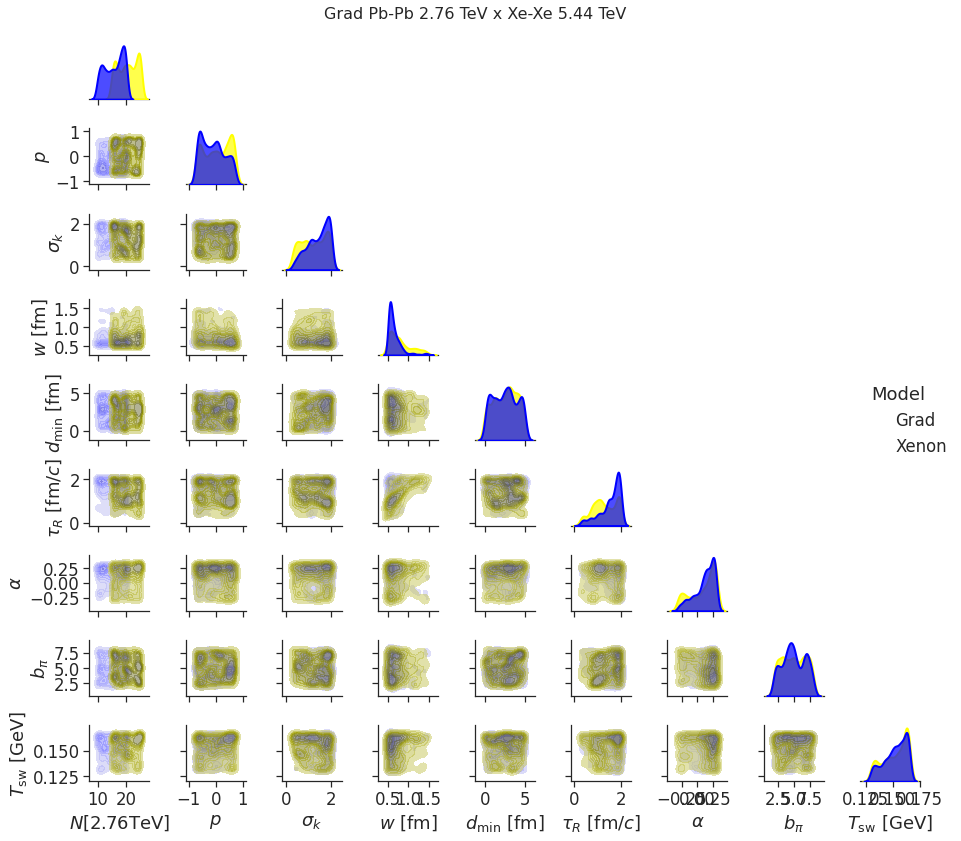

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_corner_posteriors(
    df1,
    observables_to_plot,
    idf1=0,
    idf2=None,
    df2=None,
    map_parameters=None,
    truth=None,
    prune=1,
    diag_sharey=False,
    n_samples=1400,
    idf_colors={0: 'blue', 1: 'red', 2: 'magenta', 3: 'green', 4: 'orange', 5: 'yellow'},
    idf_labels={0: 'Grad', 1: 'CE', 2: 'PTM', 3: 'PTB', 4: 'Original', 5: 'Xenon'},
    title=None,
    figsize=(12, 12)
):
    """
    Plot a corner plot (pair plot) for posterior samples from one or two viscous correction models.

    Parameters:
    - df1, df2: posterior DataFrames
    - observables_to_plot: list of indices or column names to include
    - idf1, idf2: integers (0–3), ID of the correction model
    - map_parameters, truth: optional reference values (array-like)
    - prune: thinning factor for samples
    - diag_sharey: share y-axis in diagonals
    - idf_colors, idf_labels: mapping from idf index to color/label
    - title: optional plot title
    - figsize: tuple for figure size
    """
    sns.set_context("notebook", font_scale=1.5)
    sns.set_style("ticks")

    # Subsample
    df1_sub = df1.iloc[:n_samples:prune, observables_to_plot].copy()
    df1_sub['Model'] = idf_labels[idf1]

    if df2 is not None and idf2 is not None:
        df2_sub = df2.iloc[:n_samples:prune, observables_to_plot].copy()
        df2_sub['Model'] = idf_labels[idf2]
        combined = pd.concat([df1_sub, df2_sub], ignore_index=True)
        palette = [idf_colors[idf1], idf_colors[idf2]]
    else:
        combined = df1_sub
        palette = [idf_colors[idf1]]

    # Plot
    g = sns.PairGrid(
        combined,
        hue='Model' if 'Model' in combined else None,
        corner=True,
        diag_sharey=diag_sharey,
        height=figsize[0] / len(observables_to_plot),
        palette=palette
    )

#    g.map_lower(sns.kdeplot, fill=True, alpha=0.5)
    g.map_lower(lambda x, y, **kwargs: sns.kdeplot(x=x, y=y, fill=True, **kwargs), alpha=0.5)
    g.map_diag(sns.kdeplot, linewidth=2, shade=True, alpha=0.7)

    # Add vertical reference lines
    for n, col in enumerate(combined.columns[:-1]):  # Exclude 'Model'
        ax = g.axes[n][n]

        if map_parameters is not None:
            ax.axvline(map_parameters[n], linestyle='--', color='black', label='MAP')
        if truth is not None:
            ax.axvline(truth[n], linestyle='--', color='orange', label='Truth')
        if n == 0 and (map_parameters is not None or truth is not None):
            ax.legend(loc='upper right', fontsize='small')

    if 'Model' in combined:
        g.add_legend()

    if title:
        plt.suptitle(title, fontsize=16)
#        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.tight_layout()
    else:
        plt.tight_layout()
    
    plt.savefig('corner_Grad_Pb_Xe_1.pdf', dpi=1200)
    plt.show()

plot_corner_posteriors(
    df1=posterior_Grad_Pb_df,
    df2=posterior_Grad_Xe_df,
    idf1=0,
    idf2=5,
    observables_to_plot=[0, 1, 2, 3, 4, 5, 6, 15, 16],
#    observables_to_plot=[7, 8 , 9, 10, 11, 12, 13, 14],
    map_parameters=None,  # optional
    truth=None,  # optional
    prune=1,
    n_samples=1400,
    title="Grad Pb-Pb 2.76 TeV x Xe-Xe 5.44 TeV"
)   

### Emulator's performance: effects of removing some centralities

Selected n_components: 82 to capture at least 99.0% of variance
Original data shape: (988, 294)
PC-transformed data shape: (988, 82)


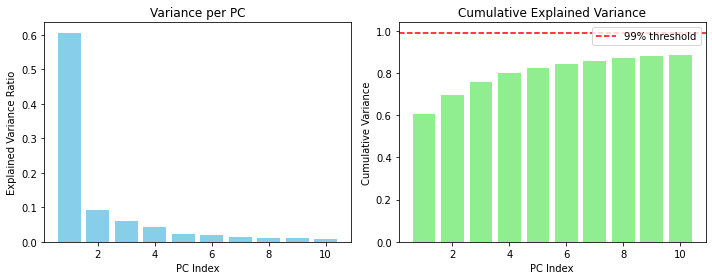

In [8]:
spectra_dict, xt_bins = load_spectra_data(idf)
Y_3d, dp_list = spectra_dict_to_array(spectra_dict)

Y_flat = prepare_simulation_data(Y_3d)
# removing some centralities: (60-70%,70-90%) = #2*42 = 84 -> 378 - 84 = 294
# I want to remain the same number of centralities (7) as Pb-Pb 2.76 TeV to compare them.
# removing some centralities
rem_cen = 2
rem_idx = Y_flat.shape[1] - rem_cen*Y_3d.shape[2] # 378 - (2*42 = 84) 
Y_flat = Y_flat[:,:rem_idx]
#print("Flattened data shape:", Y_flat.shape)

scaler, pca, Z, Y_reconstructed = fit_pca_model(Y_flat, variance_threshold=0.99)
      
# ---- PCA Explained Variance: for a pre-defined number of principal components
fig_var = plot_explained_variance(pca, n_pc_to_plot=10)
save_fig(fig_var, "explained_variance_remov_cent.pdf", folders["PCA"])

### Universality ratio: where it breaks down over the parameter space

### Difference pipeline Xe-Xe 5.44 TeV

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel as C
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

import joblib
# SALib (install with: pip install SALib)
try:
    from SALib.sample import saltelli
    from SALib.analyze import sobol
except Exception as e:
    raise ImportError("SALib not found. Install it via `pip install SALib`.") from e

from joblib import Parallel, delayed


df_names = ["Grad", "CE", "PTM", "PTB"]
color_map = ['blue', 'red', 'magenta', 'green']

# --- 1) Load Xe-Xe-5440 1,000 design points ----------------------------------------
def load_spectra_data(df, base_dir="universal_xexe/universal", xt_fname="xt_jestcape.dat"):
    """
    Returns:
      spectra: dict dp -> shape (n_cent, n_xt)
      xt_bins: array (n_cent, n_xt)
    """
    xt_bins = np.loadtxt(os.path.join(base_dir, xt_fname), comments="#")
    spec = {}
    #these are the problematic design points for Xe Xe 5440 w/ 1000 design points
#    nan_design_pts_set_Xe = set([354, 494, 601, 682, 699, 719, 736, 758, 768, 770, 834, 902, 908, 949])
#    unfinished_design_pts_set_Xe = set([328, 354, 562, 672, 682, 736, 818, 897, 902])
#    delete_design_pts_set_Xe = nan_design_pts_set_Xe.union(unfinished_design_pts_set_Xe)
    
    for fn in sorted(os.listdir(base_dir)):
        if fn.startswith(f"universal_dp") and f"_df{df}.txt" in fn:
            dp = int(fn.split("dp")[1].split("_")[0])
            # to remove problematic design points
            # if dp in delete_design_pts_set_Xe:
            #    continue
            spec[dp] = np.loadtxt(os.path.join(base_dir, fn), comments="#")
    return spec, xt_bins

def load_design(idf, base_dir="universal_xexe/universal", xt_fname="xt_jestcape.dat"):
    """
    Load the design points for Xe-Xe 5.44 TeV, removing only the ones that
    do not have corresponding spectra from load_spectra_data.
    """
    # Load all design points
    design_path = 'design_pts_Xe_Xe_5440_production/design_points_main_XeXe-5440.dat'
    design = pd.read_csv(design_path, index_col=0)

    # Load spectra to know which design points are valid
    spectra, _ = load_spectra_data(idf, base_dir=base_dir, xt_fname=xt_fname)
    valid_dps = set(spectra.keys())

    # Keep only rows whose index matches available spectra
    design = design.loc[design.index.intersection(valid_dps)]

    # Load design ranges for min/max
    range_path = 'design_pts_Xe_Xe_5440_production/design_ranges_main_XeXe-5440.dat'
    design_range = pd.read_csv(range_path, index_col=0)
    design_max = design_range['max'].values
    design_min = design_range['min'].values
    labels = design.keys()

    return design, labels, design_max, design_min

# ----------------------------
# Simple helpers
# ----------------------------
def safe_interp(x_src, y_src, x_tgt):
    """Interpolate y_src(x_src) onto x_tgt. If y_src contains NaNs, interpolate ignoring them.
       Returns array len(x_tgt)."""
    mask = np.isfinite(y_src)
    if mask.sum() < 2:
        return np.full_like(x_tgt, np.nan, dtype=float)
    f = interp1d(x_src[mask], y_src[mask], kind='linear', bounds_error=False, fill_value='extrapolate')
    return f(x_tgt)

def compute_differences_to_ref(spectra_dict, xt_bins, ref_cent_idx=0, centrality_indices=None):
    """
    spectra_dict: {dp: array(shape=(n_cent, n_xt))}
    xt_bins: array shape (n_cent, n_xt)
    Returns:
      diffs: dict dp -> array shape (n_selected_cent, n_xt_ref)  (differences Ui_on_ref - Uref_on_ref)
      xT_ref: array (n_xt_ref,)
      dp_list: sorted list of dp keys
      cent_idx_list: list of centralities included (excluding reference if you want)
    """
    dp_list = sorted(spectra_dict.keys())
    n_cent = xt_bins.shape[0]
    if centrality_indices is None:
        # include all centralities (we will keep ref as index 0 but differences for all centers including ref=0 will be zero)
        centrality_indices = list(range(n_cent))
    xT_ref = xt_bins[ref_cent_idx].copy()
    n_xt_ref = xT_ref.size

    diffs = {}
    for dp in dp_list:
        arr = spectra_dict[dp]
        if arr.shape != xt_bins.shape:
            raise ValueError(f"Shape mismatch for dp={dp}: arr.shape={arr.shape}, xt_bins.shape={xt_bins.shape}")
        Uref = arr[ref_cent_idx]
        Uref_on_ref = safe_interp(xt_bins[ref_cent_idx], Uref, xT_ref)
        out = []
        for cent in centrality_indices:
            Ui = arr[cent]
            Ui_on_ref = safe_interp(xt_bins[cent], Ui, xT_ref)
            diff = Ui_on_ref - Uref_on_ref
            out.append(diff)
        diffs[dp] = np.vstack(out)    # shape (len(centrality_indices), n_xt_ref)
    return diffs, xT_ref, dp_list, centrality_indices

def rmse_over_xt(arr):
    """arr shape (n_xt,) or (n_samples, n_xt). If 1D returns scalar RMSE; if 2D returns rmse along axis=1."""
    a = np.asarray(arr)
    if a.ndim == 1:
        valid = np.isfinite(a)
        if not np.any(valid):
            return np.nan
        return np.sqrt(np.mean(a[valid]**2))
    elif a.ndim == 2:
        # compute RMSE for each row
        out = []
        for r in a:
            valid = np.isfinite(r)
            out.append(np.sqrt(np.mean(r[valid]**2)) if np.any(valid) else np.nan)
        return np.array(out)
    else:
        raise ValueError("arr must be 1D or 2D")

def compute_integrated_differences(diffs, xT_ref, dp_list=None, method='rmse'):
    """
    Compute one scalar per (dp, centrality) summarizing the difference curve.

    Parameters
    ----------
    diffs : dict
        dp -> array shape (n_cent_sel, n_xt_ref) where each row is Ui - Uref on xT_ref.
    xT_ref : array-like
        xT grid for reference centrality (length n_xt_ref).
    dp_list : sequence or None
        Ordered list of dp to include. If None, uses sorted(diffs.keys()).
    method : {'rmse', 'l2', 'l1', 'trapezoid_abs'}
        'rmse' / 'l2' : sqrt(mean(diff^2)) across xT (same as RMSE over xT bins)
        'l1' / 'trapezoid_abs' : area = integral |diff| dx normalized by xT range

    Returns
    -------
    int_df : pandas.DataFrame
        Index = dp_list, columns = ['I_cent_0', ..., 'I_cent_{C-1}', 'I_combined']
        I_combined is sqrt(mean(I_cent^2)) (RMS across centralities).
    """
    if dp_list is None:
        dp_list = sorted(diffs.keys())
    x = np.asarray(xT_ref)
    dx_range = x.max() - x.min() if x.max() > x.min() else 1.0

    rows = []
    for dp in dp_list:
        arr = np.asarray(diffs[dp])  # shape (n_cent_sel, n_xt_ref)
        n_cent = arr.shape[0]
        vals = []
        for c in range(n_cent):
            vec = arr[c, :]
            valid = np.isfinite(vec) & np.isfinite(x)
            if not np.any(valid):
                val = np.nan
            else:
                xv = x[valid]; yv = vec[valid]
                if method in ('rmse', 'l2'):
                    val = np.sqrt(np.mean(yv**2))
                elif method in ('l1', 'trapezoid_abs'):
                    area = np.trapz(np.abs(yv), xv)
                    val = area / dx_range   # normalized L1 area
                else:
                    raise ValueError("method must be 'rmse'|'l2'|'l1'|'trapezoid_abs'")
            vals.append(val)
        vals = np.array(vals, dtype=float)
        combined = np.sqrt(np.nanmean(vals**2))   # RMS across centralities
        rows.append(np.concatenate([vals, [combined]]))
    n_cent = next(iter(diffs.values())).shape[0]
    cols = [f"I_cent_{i}" for i in range(n_cent)] + ["I_combined"]
    int_df = pd.DataFrame(rows, index=dp_list, columns=cols)
    return int_df

# ----------------------------
# Plotting: overlay differences per centrality
# ----------------------------
def plot_overlay_differences_by_centrality(diffs, xT_ref, dp_list=None, centrality_labels=None,
                                           figsize=(12,8), alpha=0.08, show_median=True,
                                           ci=(5,95), log_x=True, save_path=None):
    """
    For each centrality (rows) create a subplot overlaying all dp difference curves.
    diffs: dict dp -> (n_cent_sel, n_xt_ref)
    """
    if dp_list is None:
        dp_list = sorted(diffs.keys())
    # get dims
    sample_dp = next(iter(diffs.values()))
    n_cent_sel, n_xt = sample_dp.shape

    ncols = 3
    nrows = int(np.ceil(n_cent_sel / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()

    # gather arrays for statistical summaries per centrality
    all_stack = np.stack([diffs[dp] for dp in dp_list])  # shape (n_dp, n_cent_sel, n_xt)
    # loop centralities
    for c in range(n_cent_sel):
        ax = axes[c]
        # overlay each dp faintly
        for i_dp in range(all_stack.shape[0]):
            y = all_stack[i_dp, c, :]
            ax.plot(xT_ref, y, color=color_map[df], alpha=alpha, linewidth=0.9)
        # plot median and CI
        median = np.nanmedian(all_stack[:, c, :], axis=0)
        lo = np.nanpercentile(all_stack[:, c, :], ci[0], axis=0)
        hi = np.nanpercentile(all_stack[:, c, :], ci[1], axis=0)
        if show_median:
            ax.plot(xT_ref, median, color='C1', lw=1.5, label='median')
#        ax.fill_between(xT_ref, lo, hi, color='C1', alpha=0.25, label=f'{ci[0]}-{ci[1]}% envelope')
        ax.axhline(0, ls='--', color='k', lw=0.8)
        if centrality_labels:
            ax.set_title(centrality_labels[c])
        ax.set_xscale('log' if log_x else 'linear')
        ax.set_xlabel(r'$x_T$')
        ax.set_ylabel(r'$\Delta U = U_c - U_{0-5\%}$')
        ax.grid(True, ls='--', alpha=0.4)
#        ax.legend(fontsize=8)
    # turn off extra axes
    for ax in axes[n_cent_sel:]:
        ax.axis('off')
    plt.tight_layout()
    if save_path:
        fig.savefig(save_path, bbox_inches='tight', dpi=300)
        plt.close(fig)
    else:
        plt.show()
    return fig

def plot_integrated_differences_by_centrality(int_df, dp_list=None, centrality_labels=None,
                                              figsize=(14, 8), kind='scatter', color='C0',
                                              marker='.', s=20, jitter=False, save_path=None,
                                              sort_by=None, show_median=True, xlabel='Design point (dp)',
                                              ylabel='Integrated difference (scalar)'):
    """
    Plot the integrated differences DataFrame for each centrality in a panel grid,
    plus a final panel for the combined scalar.

    Parameters
    ----------
    int_df : pandas.DataFrame
        Output from compute_integrated_differences
    dp_list : list or None
        order of design points (index of int_df). If None, use int_df.index
    centrality_labels : list or dict
        human-readable labels for centrality indices (len n_cent_sel). If dict uses mapping index->label.
    kind : 'scatter' or 'box' or 'hist'
    jitter : bool
        add slight horizontal jitter to scatter for visibility
    sort_by : None or column name (e.g. 'I_combined') - if set, sort dp by that value (useful to see extreme DPs)
    """
    df = int_df.copy()
    if dp_list is None:
        dp_list = list(df.index)

    if sort_by is not None and sort_by in df.columns:
        order = df[sort_by].sort_values(ascending=False).index.tolist()
    else:
        order = dp_list

    n_cent = df.shape[1] - 1  # last col is I_combined
    n_panels = n_cent + 1
    ncols = min(4, n_panels)
    nrows = int(np.ceil(n_panels / ncols))

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, squeeze=False)
    axes_flat = axes.flatten()

    x_positions = np.arange(len(order))
    for i in range(n_cent):
        ax = axes_flat[i]
        col = f"I_cent_{i}"
        yvals = df.loc[order, col].values
        if kind == 'scatter':
            xs = x_positions
            if jitter:
                xs = xs + (np.random.rand(len(xs)) - 0.5) * 0.2
            ax.scatter(xs, yvals, c=color, marker=marker, s=s, alpha=0.7)
            if show_median:
                med = np.nanmedian(yvals)
                ax.axhline(med, color='k', linestyle='--', linewidth=0.9, label=f"median={med:.3e}")
        elif kind == 'box':
            ax.boxplot(yvals, vert=True, labels=[centrality_labels[i] if centrality_labels else col])
        elif kind == 'hist':
            ax.hist(yvals[~np.isnan(yvals)], bins=40, color=color, alpha=0.7)
        title = centrality_labels[i] if isinstance(centrality_labels, (list, tuple)) and i < len(centrality_labels) else f"cent {i}"
        ax.set_title(title)
        ax.set_xlabel('')
        ax.set_ylabel(ylabel)
        ax.grid(True, ls='--', alpha=0.3)

    # Final panel: combined
    axc = axes_flat[n_cent]
    yvals = df.loc[order, "I_combined"].values
    xs = x_positions
    if jitter:
        xs = xs + (np.random.rand(len(xs)) - 0.5) * 0.2
    axc.scatter(xs, yvals, c='gray', marker='o', s=s+10, alpha=0.8)
    if show_median:
        med = np.nanmedian(yvals)
        axc.axhline(med, color='k', linestyle='--', linewidth=0.9, label=f"median={med:.3e}")
    axc.set_title("Combined (RMS over centralities)")
    axc.set_xlabel(xlabel)
    axc.set_ylabel(ylabel)
    axc.grid(True, ls='--', alpha=0.3)

    # turn off extra axes if any
    for ax in axes_flat[n_panels:]:
        ax.axis('off')

    plt.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.close(fig)
    else:
        plt.show()
    return fig

# -----------------------
# TRAINING
# -----------------------
def train_gp_per_centrality(
    design_df,
    int_df,
    outputs=None,
    scale_inputs=True,
    kernel=None,
    alpha=1e-6,
    n_restarts_optimizer=5,
    random_state=0,
    save_folder=None
):
    """
    Train one GaussianProcessRegressor per output (centrality).
    design_df : pandas.DataFrame (n_dp, n_params) indexed by dp labels
    int_df    : pandas.DataFrame (n_dp, m_outputs) indexed by same dp labels
                columns typically: ['I_cent_0', 'I_cent_1', ..., 'I_combined'] or similar.
    outputs   : list of column names to train. If None -> all columns in int_df.
    scale_inputs : bool -> apply StandardScaler to inputs (recommended)
    kernel    : sklearn kernel; if None a sensible default is used
    alpha     : float, noise level added to diagonal (numerical stability)
    n_restarts_optimizer : int, GPR hyperparameter restarts
    save_folder : if provided, save each GP to save_folder/<output>.joblib

    Returns dict with:
      {'scaler': scaler or None,
       'gps': dict output_name -> trained GPR,
       'outputs': outputs}
    """
    if outputs is None:
        outputs = list(int_df.columns)

    # align indices: keep only intersection of indices in both
    common_idx = design_df.index.intersection(int_df.index)
    if len(common_idx) == 0:
        raise ValueError("No common design point indices between design_df and int_df.")
    X = design_df.loc[common_idx].values
    Y = int_df.loc[common_idx, outputs]

    # scaler
    scaler = None
    if scale_inputs:
        scaler = StandardScaler()
        Xs = scaler.fit_transform(X)
    else:
        Xs = X

    # default kernel
    if kernel is None:
        # constant * RBF + white noise
        length_scale = np.ptp(Xs, axis=0).mean() if Xs.shape[0] > 1 else 1.0
        kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=length_scale, length_scale_bounds=(1e-3, 1e3)) \
                 + WhiteKernel(noise_level=1e-3, noise_level_bounds=(1e-6, 1e1))

    gps = {}
    for col in outputs:
        y = Y[col].values
        # if all NaN skip
        if np.all(~np.isfinite(y)):
            print(f"Skipping {col}: all NaN")
            gps[col] = None
            continue
        # remove NaN rows for this target
        mask = np.isfinite(y)
        X_train = Xs[mask]
        y_train = y[mask]
        if X_train.shape[0] < 2:
            print(f"Not enough points to train GP for {col} (n={X_train.shape[0]}). Skipping.")
            gps[col] = None
            continue

        gpr = GaussianProcessRegressor(kernel=kernel, alpha=alpha, normalize_y=True,
                                       n_restarts_optimizer=n_restarts_optimizer, random_state=random_state)
        gpr.fit(X_train, y_train)
        gps[col] = gpr
        print(f"Trained GP for {col}: kernel={gpr.kernel_}")

        if save_folder:
            os.makedirs(save_folder, exist_ok=True)
            joblib.dump({'scaler': scaler, 'gpr': gpr, 'output': col}, os.path.join(save_folder, f"gp_{col}.joblib"))

    return {'scaler': scaler, 'gps': gps, 'outputs': outputs, 'index': common_idx}

# -----------------------
# PREDICTION
# -----------------------
def predict_gp_ensemble(gp_dict, design_df_new, return_std=False):
    """
    Predict per-output using the trained gp_dict returned by train_gp_per_centrality.
    design_df_new: DataFrame (n_new, n_params) or ndarray
    return_std: if True return tuple (pred_df, std_df) else pred_df
    """
    scaler = gp_dict['scaler']
    gps = gp_dict['gps']
    outputs = gp_dict['outputs']

    if isinstance(design_df_new, pd.DataFrame):
        Xnew = design_df_new.loc[:, :].values
        idx = design_df_new.index
    else:
        Xnew = np.asarray(design_df_new)
        idx = np.arange(Xnew.shape[0])

    if scaler is not None:
        Xs = scaler.transform(Xnew)
    else:
        Xs = Xnew

    preds = {}
    stds = {}
    for col in outputs:
        gpr = gps.get(col)
        if gpr is None:
            preds[col] = np.full(Xs.shape[0], np.nan)
            stds[col] = np.full(Xs.shape[0], np.nan)
            continue
        # Note: if this GP was trained on a subset (due to NaNs), gpr.predict expects Xs with
        # same number of features - that's satisfied because scaler applied globally.
        if return_std:
            mu, sigma = gpr.predict(Xs, return_std=True)
            preds[col] = mu
            stds[col] = sigma
        else:
            preds[col] = gpr.predict(Xs)
            stds[col] = np.full(Xs.shape[0], np.nan)

    pred_df = pd.DataFrame(preds, index=idx)
    std_df = pd.DataFrame(stds, index=idx)
    return (pred_df, std_df) if return_std else pred_df

# -----------------------
# CROSS-VALIDATION (K-Fold) for diagnostics
# -----------------------
def cross_validate_gp_per_centrality(gp_dict_template, design_df, int_df, cv=5, random_state=0):
    """
    Perform KFold cross-validated prediction for each centrality.
    gp_dict_template: same structure returned by train_gp_per_centrality OR an args template.
                     For convenience you can pass the returned dict and this function will refit inside each fold.
    Returns:
      metrics_df: DataFrame per-output rmse and R2
      y_true_df, y_pred_df: DataFrames (n_dp, n_outputs) with true and out-of-fold predictions.
    """
    outputs = gp_dict_template['outputs']
    index = gp_dict_template['index']
    X = design_df.loc[index].values
    Y = int_df.loc[index, outputs].values
    n = X.shape[0]

    kf = KFold(n_splits=cv, shuffle=True, random_state=random_state)
    preds = np.full_like(Y, np.nan, dtype=float)

    # For each fold train per centrality on train fold and predict on test fold
    for train_idx, test_idx in kf.split(X):
        X_train = X[train_idx]
        X_test = X[test_idx]
        # apply scaler if present
        scaler = gp_dict_template['scaler']
        if scaler is not None:
            Xs_train = scaler.transform(X_train)
            Xs_test = scaler.transform(X_test)
        else:
            Xs_train, Xs_test = X_train, X_test

        # for each output train GP on training subset (skipping NaNs) and predict test subset
        for j, out in enumerate(outputs):
            y_all = Y[:, j]
            # training y
            mask_train = np.isfinite(y_all[train_idx])
            if mask_train.sum() < 2:
                continue
            gpr = GaussianProcessRegressor(kernel=None)  # placeholder, will be replaced by fitting
            # Recreate kernel and hyperparams from template GP if available
            template_gpr = gp_dict_template['gps'].get(out)
            if template_gpr is not None:
                kernel = template_gpr.kernel  # note: kernel object itself is fine
                # create new GPR with same hyperparam search settings:
                gpr = GaussianProcessRegressor(kernel=kernel, alpha=template_gpr.alpha,
                                               n_restarts_optimizer=template_gpr._n_restarts_optimizer,
                                               normalize_y=True, random_state=0)
            else:
                # fallback kernel
                kernel = C(1.0) * RBF(1.0) + WhiteKernel(1e-3)
                gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, n_restarts_optimizer=0, normalize_y=True)

            # fit only on train rows that are finite for this output
            X_train_sub = Xs_train[mask_train]
            y_train_sub = y_all[train_idx][mask_train]
            gpr.fit(X_train_sub, y_train_sub)
            # predict on test rows (all test rows, even if template had NaNs)
            mu = gpr.predict(Xs_test)
            preds[test_idx, j] = mu

    # compute metrics
    metrics = []
    for j, out in enumerate(outputs):
        true = Y[:, j]
        pred = preds[:, j]
        mask = np.isfinite(true) & np.isfinite(pred)
        if not np.any(mask):
            rmse = np.nan; r2 = np.nan
        else:
            rmse = np.sqrt(mean_squared_error(true[mask], pred[mask]))
            r2 = r2_score(true[mask], pred[mask])
        metrics.append({'output': out, 'rmse': rmse, 'r2': r2})
    metrics_df = pd.DataFrame(metrics).set_index('output')

    y_true_df = pd.DataFrame(Y, index=index, columns=outputs)
    y_pred_df = pd.DataFrame(preds, index=index, columns=outputs)

    return metrics_df, y_true_df, y_pred_df


# -----------------------
# PLOTTING
# -----------------------
def plot_gp_parity_panels(y_true_df, y_pred_df, save_path=None, figsize=(12,6), centrality_labels=None):
    """
    Parity scatter plot per centrality (one axis each).
    """
    outputs = y_true_df.columns.tolist()
    n = len(outputs)
    ncols = min(4, n)
    nrows = int(np.ceil(n / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()
    for i, out in enumerate(outputs):
        ax = axes[i]
        true = y_true_df[out].values
        pred = y_pred_df[out].values
        mask = np.isfinite(true) & np.isfinite(pred)
        ax.scatter(true[mask], pred[mask], s=8, alpha=0.6)
        mn = np.nanmin(np.concatenate([true[mask], pred[mask]]))
        mx = np.nanmax(np.concatenate([true[mask], pred[mask]]))
        ax.plot([mn, mx], [mn, mx], 'k--', lw=0.8)
        ax.set_xlabel('true')
        ax.set_ylabel('pred')
        title = centrality_labels[i] if centrality_labels and i < len(centrality_labels) else out
        ax.set_title(title)
    for ax in axes[n:]:
        ax.axis('off')
    plt.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.close(fig)
    else:
        plt.show()
    return fig


def plot_rmse_bar(metrics_df, save_path=None, figsize=(8,4)):
    fig, ax = plt.subplots(figsize=figsize)
    metrics_df['rmse'].plot(kind='bar', ax=ax, color='C0')
    ax.set_ylabel("RMSE (integrated diff units)")
    ax.grid(True, ls='--', alpha=0.3)
    plt.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.close(fig)
    else:
        plt.show()
    return fig

def compute_sobol_all_centralities(
    gp_dict,
    design_df_template,
    param_names=None,
    param_bounds=None,
    N_base=1024,
    calc_second_order=False,
    n_jobs=1,
    random_seed=0,
    verbose=True
):
    """
    Compute Sobol indices for every output (centrality) emulated by gp_dict.

    Parameters
    ----------
    gp_dict : dict
        Returned from train_gp_per_centrality. Contains 'scaler','gps','outputs','index'.
        'outputs' should be the list of integrated-difference column names (e.g. I_cent_0..I_combined).
        We will compute indices for outputs excluding the combined column if present (but you can include it).
    design_df_template : pandas.DataFrame
        A DataFrame with parameter columns (17 parameters) -- used only to get parameter order and index.
        Can be the `design_df` you used to train. Values are not used (we will sample using bounds).
    param_names : list or None
        If provided, names of parameters (length 17). Otherwise we use design_df_template.columns.
    param_bounds : array-like shape (n_params, 2) or None
        If provided, explicit bounds [[min,max],...]. Otherwise attempt to get from design_df_template
        by taking column-wise min and max (useful if design_df contains the full design range).
    N_base : int
        base sample size for Saltelli sampler (see SALib docs). Total samples = (2D+2)*N_base.
    calc_second_order : bool
        If True compute second-order indices (computationally expensive with D=17).
    n_jobs : int
        Number of parallel workers for model evaluation (if using joblib).
    random_seed : int
        Random seed for reproducibility.
    verbose : bool
        Print progress.

    Returns
    -------
    sobol_results : dict with keys:
       'problem' : SALib problem dict
       'param_values' : sample matrix (n_samples, D)
       'S1_df' : DataFrame (centralities x parameters) containing first-order indices
       'ST_df' : DataFrame (centralities x parameters) containing total-order indices
       'raw' : dictionary centrality -> sobol.analyze result dict
    """
    # ---------------------------
    # prepare parameter names & bounds
    # ---------------------------
    if param_names is None:
        param_names = list(design_df_template.columns)
    D = len(param_names)
    if param_bounds is None:
        # try to infer from design_df_template
        mins = design_df_template.min(axis=0).values
        maxs = design_df_template.max(axis=0).values
        param_bounds = np.column_stack([mins, maxs]).tolist()
    else:
        param_bounds = np.asarray(param_bounds).tolist()
    if len(param_bounds) != D:
        raise ValueError("param_bounds length must match number of parameters (D).")

    problem = {"num_vars": D, "names": list(param_names), "bounds": param_bounds}

    if verbose:
        print(f"Saltelli sampling: D={D}, N_base={N_base}, calc_second_order={calc_second_order}")
        print(f"Total sample count = (2D+2)*N_base = {(2*D+2)*N_base}")

    # ---------------------------
    # Sample parameter space using Saltelli
    # ---------------------------
    param_values = saltelli.sample(problem, N_base, calc_second_order=calc_second_order)
    n_samples = param_values.shape[0]
    if verbose:
        print(f"Generated param matrix shape: {param_values.shape}")

    # convert samples to DataFrame with correct column order
    samples_df = pd.DataFrame(param_values, columns=param_names)

    # ---------------------------
    # Evaluate emulator (vectorized prediction)
    # ---------------------------
    if verbose:
        print("Predicting emulators for all samples (this may take a while)...")

    # Predict all outputs at once: predict_gp_ensemble should accept DataFrame and return DataFrame preds
    # If your predict function expects a numpy array, adapt accordingly.
    preds_df, std_df = predict_gp_ensemble(gp_dict, samples_df, return_std=True)  # preds_df: (n_samples, n_outputs)

    # outputs list
    outputs = gp_dict['outputs']
    # We'll create S1/ST per output (each output is a centrality scalar).
    S1_matrix = np.zeros((len(outputs), D))
    ST_matrix = np.zeros((len(outputs), D))
    raw_results = {}

    for i_out, out in enumerate(outputs):
        Y = preds_df[out].values
        # check for finite values
        if not np.all(np.isfinite(Y)):
            print(f"Warning: non-finite predictions for output {out}. Will mask NaNs for Sobol analyze.")
            # Masking: sobol.analyze requires full vector; we must drop indices where Y is NaN.
            valid_mask = np.isfinite(Y)
            if np.sum(valid_mask) < 10:
                raise RuntimeError(f"Too few valid emulator evaluations for output {out}.")
            # The Saltelli/Sobol methods require the sample matrix structure; removing rows breaks structure.
            # Simpler approach: fill NaNs with the median prediction (small hack) — but better is to ensure emulator returns finite values.
            Y = np.nan_to_num(Y, nan=np.nanmedian(Y))
        # run sobol analysis
        res = sobol.analyze(problem, Y, calc_second_order=calc_second_order, print_to_console=False)
        # res contains keys: 'S1','S1_conf','ST','ST_conf' (and 'S2' if requested)
        S1_matrix[i_out, :] = res['S1']
        ST_matrix[i_out, :] = res['ST']
        raw_results[out] = res
        if verbose:
            print(f"Done Sobol for output {out}: max S1={np.nanmax(res['S1']):.3f}, max ST={np.nanmax(res['ST']):.3f}")

    # assemble DataFrames: rows = outputs (centralities), columns = param_names
    S1_df = pd.DataFrame(S1_matrix, index=outputs, columns=param_names)
    ST_df = pd.DataFrame(ST_matrix, index=outputs, columns=param_names)

    sobol_results = {
        "problem": problem,
        "param_values": param_values,
        "S1_df": S1_df,
        "ST_df": ST_df,
        "raw": raw_results
    }
    return sobol_results

def plot_sobol_heatmaps(sobol_results, centrality_labels=None, param_labels=None,
                        figsize=(14, 6), cmap='viridis', vmin=None, vmax=None,
                        save_path=None, show_values=False):
    """
    Plot two heatmaps side-by-side: S1 and ST.
    Rows = centralities (sobol_results['S1_df'].index)
    Columns = parameters (sobol_results['S1_df'].columns)
    """
    S1 = sobol_results['S1_df']
    ST = sobol_results['ST_df']

    outputs = S1.index.tolist()
#    params = S1.columns.tolist()
    latex_labels_path = 'design_pts_Xe_Xe_5440_production/design_labels_XeXe-5440.dat'
    latex_labels = pd.read_csv(latex_labels_path, header=None)
    params = latex_labels.iloc[:,0].tolist()

    if centrality_labels is None:
        centrality_labels = outputs
    if param_labels is None:
        param_labels = params

    # set color scale if not provided
    if vmin is None:
        vmin = 0.0
    if vmax is None:
        # common vmax from ST (more spread), clip to [0,1]
        vmax = min(1.0, max(ST.max().max(), S1.max().max()) * 1.05)

    fig, axes = plt.subplots(1, 2, figsize=figsize, constrained_layout=True)

    im0 = axes[0].imshow(S1.values, aspect='auto', origin='lower', vmin=vmin, vmax=vmax, cmap=cmap)
    axes[0].set_title("Sobol first-order (S1)")
    axes[0].set_yticks(np.arange(len(outputs))); axes[0].set_yticklabels(centrality_labels)
    axes[0].set_xticks(np.arange(len(params))); axes[0].set_xticklabels(param_labels, rotation=90, fontsize=8)
    cbar0 = fig.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)
    cbar0.set_label("S1")

    im1 = axes[1].imshow(ST.values, aspect='auto', origin='lower', vmin=vmin, vmax=vmax, cmap=cmap)
    axes[1].set_title("Sobol total-order (ST)")
    axes[1].set_yticks(np.arange(len(outputs))); axes[1].set_yticklabels(centrality_labels)
    axes[1].set_xticks(np.arange(len(params))); axes[1].set_xticklabels(param_labels, rotation=90, fontsize=8)
    cbar1 = fig.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)
    cbar1.set_label("ST")

    if show_values:
        for ax, M in zip(axes, [S1.values, ST.values]):
            for (i, j), val in np.ndenumerate(M):
                ax.text(j, i, f"{val:.2f}", ha='center', va='center', fontsize=6, color='white' if val > (vmax*0.45) else 'black')

    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.close(fig)
    else:
        plt.show()
    return fig

# ----------------------------
# Example: usage (replace loader with your own)
# ----------------------------
if __name__ == "__main__":
    
    base_dir = "universal_xexe/universal"
    df = 0   # (viscous correction index)
    # simple loader that gathers all matching files into spectra_dict:
    spectra_dict = {}
    for fname in sorted(os.listdir(base_dir)):
        if fname.startswith("universal_dp") and f"_df{df}.txt" in fname:
            dp = int(fname.split("dp")[1].split("_")[0])
            arr = np.loadtxt(os.path.join(base_dir, fname), comments="#")
            spectra_dict[dp] = arr
    # load xt grid (must exist)
    xt_bins = np.loadtxt(os.path.join(base_dir, "xt_jestcape.dat"), comments="#")

    # centrality labels (9 centralities typical)
    centrality_labels = ['0-5%', '5-10%','10-20%','20-30%','30-40%','40-50%','50-60%','60-70%','70-90%']

    # compute differences (ref = 0-5%)
    diffs, xT_ref, dp_list, cent_idx_list = compute_differences_to_ref(spectra_dict, xt_bins, ref_cent_idx=0)
    
    # compute integrated scalars (per dp, per centrality) using RMSE (L2)
    int_df = compute_integrated_differences(diffs, xT_ref, dp_list=dp_list, method='rmse')
    # alternative: method='l1'
    
    print(int_df.shape)
        
    # overlay plot by centrality (each panel overlays all dp)
#    fig = plot_overlay_differences_by_centrality(diffs, xT_ref, dp_list=dp_list,
#                                                 centrality_labels=centrality_labels,
#                                                 figsize=(12,8), alpha=0.08,
#                                                 show_median=False, ci=(10,90),
#                                                 log_x=True, save_path=f"differences_overlay_per_centrality_{df_names[df]}.pdf")
#    print("Saved differences overlay to differences_overlay_per_centrality.pdf")
    
    # plot integrated differences by centrality + combined
#    fig_int = plot_integrated_differences_by_centrality(
#        int_df,
#        dp_list=dp_list,
#        centrality_labels=centrality_labels,
#        figsize=(14, 8),
#        kind='scatter',
#        color=f'{color_map[df]}',
#        marker='o',
#        s=14,
#        jitter=True,
#        sort_by=None,   # will sort dp by combined RMS (largest -> left)
#        show_median=False,
#        save_path=f"integrated_differences_per_centrality_df_{df_names[df]}.pdf"
#    )
#    print("Saved integrated differences to", f"integrated_differences_per_centrality_df_{df_names[df]}.pdf")
    
#    load design_df (DataFrame indexed by dp labels) and int_df (DataFrame indexed by the same dp labels)
#    design_df, labels, dmax, dmin = load_design(df)   # shape (n_dp, n_params)
    
    # train one GP per centrality
#    out_folder = f"emulators/int_diff_gp_per_centrality_df_{df_names[df]}"
#    gp_dict = train_gp_per_centrality(design_df, int_df, scale_inputs=True,
#                                  n_restarts_optimizer=3, save_folder=out_folder)
    
    # cross-validated diagnostic
#    metrics_df, y_true_df, y_pred_df = cross_validate_gp_per_centrality(gp_dict, design_df, int_df, cv=5)
#    print(metrics_df)
#    plot_gp_parity_panels(y_true_df, y_pred_df, save_path="gp_parity_per_centrality.pdf")
#    plot_rmse_bar(metrics_df, save_path="gp_rmse_per_centrality.pdf")
    
### (2)fix here! design_new = pd.read_csv("design_points_full.csv", index_col=0)
#    pred_df, std_df = predict_gp_ensemble(gp_dict, design_new, return_std=True)
    
    # GSA: calculating and plotting Sobol indices
    # recommended base sample
#    N_base = 1024   # try 512 or 1024; increase for more accurate estimates
#    sobol_res = compute_sobol_all_centralities(
#        gp_dict=gp_dict,
#        design_df_template=design_df,   # just to get param names & bounds
#        N_base=N_base,
#        calc_second_order=False,
#        n_jobs=1,
#        verbose=True
#    )
    
    # You can provide nicer labels for centralities:
#    centrality_labels = ['0-5%','5-10%','10-20%','20-30%','30-40%','40-50%','50-60%','60-70%','70-90%','combined']
#    param_labels = [short names] or use design_df.columns
#    fig = plot_sobol_heatmaps(sobol_res, centrality_labels=centrality_labels, save_path=f"sobol_heatmaps_{df_names[df]}.pdf", show_values=True)        

(988, 10)


### Difference pipeline Pb-Pb 2.76 TeV

In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel as C
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

import joblib
# SALib (install with: pip install SALib)
try:
    from SALib.sample import saltelli
    from SALib.analyze import sobol
except Exception as e:
    raise ImportError("SALib not found. Install it via `pip install SALib`.") from e

from joblib import Parallel, delayed


df_names = ["Grad", "CE", "PTM", "PTB"]
color_map = ['blue', 'red', 'magenta', 'green']

# --- 1) Load Pb-Pb-2760 500 design points ----------------------------------------
def load_spectra_data(df, base_dir="universal_xexe/universal", xt_fname="xt_jestcape.dat"):
    """
    Returns:
      spectra: dict dp -> shape (n_cent, n_xt)
      xt_bins: array (n_cent, n_xt)
    """
    xt_bins = np.loadtxt(os.path.join(base_dir, xt_fname), comments="#")
    spec = {}
    #these are the problematic design points for Xe Xe 5440 w/ 1000 design points
#    nan_design_pts_set_Xe = set([354, 494, 601, 682, 699, 719, 736, 758, 768, 770, 834, 902, 908, 949])
#    unfinished_design_pts_set_Xe = set([328, 354, 562, 672, 682, 736, 818, 897, 902])
#    delete_design_pts_set_Xe = nan_design_pts_set_Xe.union(unfinished_design_pts_set_Xe)
    
    for fn in sorted(os.listdir(base_dir)):
        if fn.startswith(f"universal_dp") and f"_df{df}.txt" in fn:
            dp = int(fn.split("dp")[1].split("_")[0])
            # to remove problematic design points
            # if dp in delete_design_pts_set_Xe:
            #    continue
            spec[dp] = np.loadtxt(os.path.join(base_dir, fn), comments="#")
    return spec, xt_bins

def load_design(idf, base_dir="universal_PbPb/universal", xt_fname="xt_jestcape.dat"):
    """
    Load the design points for Pb-Pb 2.76 TeV, removing only the ones that
    do not have corresponding spectra from load_spectra_data.
    """
    # Load all design points
    design_path = 'design_pts_Pb_Pb_2760_production/design_points_main_PbPb-2760.dat'
    design = pd.read_csv(design_path, index_col=0)

    # Load spectra to know which design points are valid
    spectra, _ = load_spectra_data(idf, base_dir=base_dir, xt_fname=xt_fname)
    valid_dps = set(spectra.keys())

    # Keep only rows whose index matches available spectra
    design = design.loc[design.index.intersection(valid_dps)]

    # Load design ranges for min/max
    range_path = 'design_pts_Pb_Pb_2760_production/design_ranges_main_PbPb-2760.dat'
    design_range = pd.read_csv(range_path, index_col=0)
    design_max = design_range['max'].values
    design_min = design_range['min'].values
    labels = design.keys()

    return design, labels, design_max, design_min

# ----------------------------
# Simple helpers
# ----------------------------
def safe_interp(x_src, y_src, x_tgt):
    """Interpolate y_src(x_src) onto x_tgt. If y_src contains NaNs, interpolate ignoring them.
       Returns array len(x_tgt)."""
    mask = np.isfinite(y_src)
    if mask.sum() < 2:
        return np.full_like(x_tgt, np.nan, dtype=float)
    f = interp1d(x_src[mask], y_src[mask], kind='linear', bounds_error=False, fill_value='extrapolate')
    return f(x_tgt)

def compute_differences_to_ref(spectra_dict, xt_bins, ref_cent_idx=0, centrality_indices=None):
    """
    spectra_dict: {dp: array(shape=(n_cent, n_xt))}
    xt_bins: array shape (n_cent, n_xt)
    Returns:
      diffs: dict dp -> array shape (n_selected_cent, n_xt_ref)  (differences Ui_on_ref - Uref_on_ref)
      xT_ref: array (n_xt_ref,)
      dp_list: sorted list of dp keys
      cent_idx_list: list of centralities included (excluding reference if you want)
    """
    dp_list = sorted(spectra_dict.keys())
    n_cent = xt_bins.shape[0]
    if centrality_indices is None:
        # include all centralities (we will keep ref as index 0 but differences for all centers including ref=0 will be zero)
        centrality_indices = list(range(n_cent))
    xT_ref = xt_bins[ref_cent_idx].copy()
    n_xt_ref = xT_ref.size

    diffs = {}
    for dp in dp_list:
        arr = spectra_dict[dp]
        if arr.shape != xt_bins.shape:
            raise ValueError(f"Shape mismatch for dp={dp}: arr.shape={arr.shape}, xt_bins.shape={xt_bins.shape}")
        Uref = arr[ref_cent_idx]
        Uref_on_ref = safe_interp(xt_bins[ref_cent_idx], Uref, xT_ref)
        out = []
        for cent in centrality_indices:
            Ui = arr[cent]
            Ui_on_ref = safe_interp(xt_bins[cent], Ui, xT_ref)
            diff = Ui_on_ref - Uref_on_ref
            out.append(diff)
        diffs[dp] = np.vstack(out)    # shape (len(centrality_indices), n_xt_ref)
    return diffs, xT_ref, dp_list, centrality_indices

def rmse_over_xt(arr):
    """arr shape (n_xt,) or (n_samples, n_xt). If 1D returns scalar RMSE; if 2D returns rmse along axis=1."""
    a = np.asarray(arr)
    if a.ndim == 1:
        valid = np.isfinite(a)
        if not np.any(valid):
            return np.nan
        return np.sqrt(np.mean(a[valid]**2))
    elif a.ndim == 2:
        # compute RMSE for each row
        out = []
        for r in a:
            valid = np.isfinite(r)
            out.append(np.sqrt(np.mean(r[valid]**2)) if np.any(valid) else np.nan)
        return np.array(out)
    else:
        raise ValueError("arr must be 1D or 2D")

def compute_integrated_differences(diffs, xT_ref, dp_list=None, method='rmse'):
    """
    Compute one scalar per (dp, centrality) summarizing the difference curve.

    Parameters
    ----------
    diffs : dict
        dp -> array shape (n_cent_sel, n_xt_ref) where each row is Ui - Uref on xT_ref.
    xT_ref : array-like
        xT grid for reference centrality (length n_xt_ref).
    dp_list : sequence or None
        Ordered list of dp to include. If None, uses sorted(diffs.keys()).
    method : {'rmse', 'l2', 'l1', 'trapezoid_abs'}
        'rmse' / 'l2' : sqrt(mean(diff^2)) across xT (same as RMSE over xT bins)
        'l1' / 'trapezoid_abs' : area = integral |diff| dx normalized by xT range

    Returns
    -------
    int_df : pandas.DataFrame
        Index = dp_list, columns = ['I_cent_0', ..., 'I_cent_{C-1}', 'I_combined']
        I_combined is sqrt(mean(I_cent^2)) (RMS across centralities).
    """
    if dp_list is None:
        dp_list = sorted(diffs.keys())
    x = np.asarray(xT_ref)
    dx_range = x.max() - x.min() if x.max() > x.min() else 1.0

    rows = []
    for dp in dp_list:
        arr = np.asarray(diffs[dp])  # shape (n_cent_sel, n_xt_ref)
        n_cent = arr.shape[0]
        vals = []
        for c in range(n_cent):
            vec = arr[c, :]
            valid = np.isfinite(vec) & np.isfinite(x)
            if not np.any(valid):
                val = np.nan
            else:
                xv = x[valid]; yv = vec[valid]
                if method in ('rmse', 'l2'):
                    val = np.sqrt(np.mean(yv**2))
                elif method in ('l1', 'trapezoid_abs'):
                    area = np.trapz(np.abs(yv), xv)
                    val = area / dx_range   # normalized L1 area
                else:
                    raise ValueError("method must be 'rmse'|'l2'|'l1'|'trapezoid_abs'")
            vals.append(val)
        vals = np.array(vals, dtype=float)
        combined = np.sqrt(np.nanmean(vals**2))   # RMS across centralities
        rows.append(np.concatenate([vals, [combined]]))
    n_cent = next(iter(diffs.values())).shape[0]
    cols = [f"I_cent_{i}" for i in range(n_cent)] + ["I_combined"]
    int_df = pd.DataFrame(rows, index=dp_list, columns=cols)
    return int_df

# ----------------------------
# Plotting: overlay differences per centrality
# ----------------------------
def plot_overlay_differences_by_centrality(diffs, xT_ref, dp_list=None, centrality_labels=None,
                                           figsize=(12,8), alpha=0.08, show_median=True,
                                           ci=(5,95), log_x=True, save_path=None):
    """
    For each centrality (rows) create a subplot overlaying all dp difference curves.
    diffs: dict dp -> (n_cent_sel, n_xt_ref)
    """
    if dp_list is None:
        dp_list = sorted(diffs.keys())
    # get dims
    sample_dp = next(iter(diffs.values()))
    n_cent_sel, n_xt = sample_dp.shape

    ncols = 3
    nrows = int(np.ceil(n_cent_sel / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()

    # gather arrays for statistical summaries per centrality
    all_stack = np.stack([diffs[dp] for dp in dp_list])  # shape (n_dp, n_cent_sel, n_xt)
    # loop centralities
    for c in range(n_cent_sel):
        ax = axes[c]
        # overlay each dp faintly
        for i_dp in range(all_stack.shape[0]):
            y = all_stack[i_dp, c, :]
            ax.plot(xT_ref, y, color=color_map[df], alpha=alpha, linewidth=0.9)
        # plot median and CI
        median = np.nanmedian(all_stack[:, c, :], axis=0)
        lo = np.nanpercentile(all_stack[:, c, :], ci[0], axis=0)
        hi = np.nanpercentile(all_stack[:, c, :], ci[1], axis=0)
        if show_median:
            ax.plot(xT_ref, median, color='C1', lw=1.5, label='median')
#        ax.fill_between(xT_ref, lo, hi, color='C1', alpha=0.25, label=f'{ci[0]}-{ci[1]}% envelope')
        ax.axhline(0, ls='--', color='k', lw=0.8)
        if centrality_labels:
            ax.set_title(centrality_labels[c])
        ax.set_xscale('log' if log_x else 'linear')
        ax.set_xlabel(r'$x_T$')
        ax.set_ylabel(r'$\Delta U = U_c - U_{0-5\%}$')
        ax.grid(True, ls='--', alpha=0.4)
#        ax.legend(fontsize=8)
    # turn off extra axes
    for ax in axes[n_cent_sel:]:
        ax.axis('off')
    plt.tight_layout()
    if save_path:
        fig.savefig(save_path, bbox_inches='tight', dpi=300)
        plt.close(fig)
    else:
        plt.show()
    return fig

def plot_integrated_differences_by_centrality(int_df, dp_list=None, centrality_labels=None,
                                              figsize=(14, 8), kind='scatter', color='C0',
                                              marker='.', s=20, jitter=False, save_path=None,
                                              sort_by=None, show_median=True, xlabel='Design point (dp)',
                                              ylabel='Integrated difference (scalar)'):
    """
    Plot the integrated differences DataFrame for each centrality in a panel grid,
    plus a final panel for the combined scalar.

    Parameters
    ----------
    int_df : pandas.DataFrame
        Output from compute_integrated_differences
    dp_list : list or None
        order of design points (index of int_df). If None, use int_df.index
    centrality_labels : list or dict
        human-readable labels for centrality indices (len n_cent_sel). If dict uses mapping index->label.
    kind : 'scatter' or 'box' or 'hist'
    jitter : bool
        add slight horizontal jitter to scatter for visibility
    sort_by : None or column name (e.g. 'I_combined') - if set, sort dp by that value (useful to see extreme DPs)
    """
    df = int_df.copy()
    if dp_list is None:
        dp_list = list(df.index)

    if sort_by is not None and sort_by in df.columns:
        order = df[sort_by].sort_values(ascending=False).index.tolist()
    else:
        order = dp_list

    n_cent = df.shape[1] - 1  # last col is I_combined
    n_panels = n_cent + 1
    ncols = min(4, n_panels)
    nrows = int(np.ceil(n_panels / ncols))

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, squeeze=False)
    axes_flat = axes.flatten()

    x_positions = np.arange(len(order))
    for i in range(n_cent):
        ax = axes_flat[i]
        col = f"I_cent_{i}"
        yvals = df.loc[order, col].values
        if kind == 'scatter':
            xs = x_positions
            if jitter:
                xs = xs + (np.random.rand(len(xs)) - 0.5) * 0.2
            ax.scatter(xs, yvals, c=color, marker=marker, s=s, alpha=0.7)
            if show_median:
                med = np.nanmedian(yvals)
                ax.axhline(med, color='k', linestyle='--', linewidth=0.9, label=f"median={med:.3e}")
        elif kind == 'box':
            ax.boxplot(yvals, vert=True, labels=[centrality_labels[i] if centrality_labels else col])
        elif kind == 'hist':
            ax.hist(yvals[~np.isnan(yvals)], bins=40, color=color, alpha=0.7)
        title = centrality_labels[i] if isinstance(centrality_labels, (list, tuple)) and i < len(centrality_labels) else f"cent {i}"
        ax.set_title(title)
        ax.set_xlabel('')
        ax.set_ylabel(ylabel)
        ax.grid(True, ls='--', alpha=0.3)

    # Final panel: combined
    axc = axes_flat[n_cent]
    yvals = df.loc[order, "I_combined"].values
    xs = x_positions
    if jitter:
        xs = xs + (np.random.rand(len(xs)) - 0.5) * 0.2
    axc.scatter(xs, yvals, c='gray', marker='o', s=s+10, alpha=0.8)
    if show_median:
        med = np.nanmedian(yvals)
        axc.axhline(med, color='k', linestyle='--', linewidth=0.9, label=f"median={med:.3e}")
    axc.set_title("Combined (RMS over centralities)")
    axc.set_xlabel(xlabel)
    axc.set_ylabel(ylabel)
    axc.grid(True, ls='--', alpha=0.3)

    # turn off extra axes if any
    for ax in axes_flat[n_panels:]:
        ax.axis('off')

    plt.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.close(fig)
    else:
        plt.show()
    return fig

# -----------------------
# TRAINING
# -----------------------
def train_gp_per_centrality(
    design_df,
    int_df,
    outputs=None,
    scale_inputs=True,
    kernel=None,
    alpha=1e-6,
    n_restarts_optimizer=5,
    random_state=0,
    save_folder=None
):
    """
    Train one GaussianProcessRegressor per output (centrality).
    design_df : pandas.DataFrame (n_dp, n_params) indexed by dp labels
    int_df    : pandas.DataFrame (n_dp, m_outputs) indexed by same dp labels
                columns typically: ['I_cent_0', 'I_cent_1', ..., 'I_combined'] or similar.
    outputs   : list of column names to train. If None -> all columns in int_df.
    scale_inputs : bool -> apply StandardScaler to inputs (recommended)
    kernel    : sklearn kernel; if None a sensible default is used
    alpha     : float, noise level added to diagonal (numerical stability)
    n_restarts_optimizer : int, GPR hyperparameter restarts
    save_folder : if provided, save each GP to save_folder/<output>.joblib

    Returns dict with:
      {'scaler': scaler or None,
       'gps': dict output_name -> trained GPR,
       'outputs': outputs}
    """
    if outputs is None:
        outputs = list(int_df.columns)

    # align indices: keep only intersection of indices in both
    common_idx = design_df.index.intersection(int_df.index)
    if len(common_idx) == 0:
        raise ValueError("No common design point indices between design_df and int_df.")
    X = design_df.loc[common_idx].values
    Y = int_df.loc[common_idx, outputs]

    # scaler
    scaler = None
    if scale_inputs:
        scaler = StandardScaler()
        Xs = scaler.fit_transform(X)
    else:
        Xs = X

    # default kernel
    if kernel is None:
        # constant * RBF + white noise
        length_scale = np.ptp(Xs, axis=0).mean() if Xs.shape[0] > 1 else 1.0
        kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=length_scale, length_scale_bounds=(1e-3, 1e3)) \
                 + WhiteKernel(noise_level=1e-3, noise_level_bounds=(1e-6, 1e1))

    gps = {}
    for col in outputs:
        y = Y[col].values
        # if all NaN skip
        if np.all(~np.isfinite(y)):
            print(f"Skipping {col}: all NaN")
            gps[col] = None
            continue
        # remove NaN rows for this target
        mask = np.isfinite(y)
        X_train = Xs[mask]
        y_train = y[mask]
        if X_train.shape[0] < 2:
            print(f"Not enough points to train GP for {col} (n={X_train.shape[0]}). Skipping.")
            gps[col] = None
            continue

        gpr = GaussianProcessRegressor(kernel=kernel, alpha=alpha, normalize_y=True,
                                       n_restarts_optimizer=n_restarts_optimizer, random_state=random_state)
        gpr.fit(X_train, y_train)
        gps[col] = gpr
        print(f"Trained GP for {col}: kernel={gpr.kernel_}")

        if save_folder:
            os.makedirs(save_folder, exist_ok=True)
            joblib.dump({'scaler': scaler, 'gpr': gpr, 'output': col}, os.path.join(save_folder, f"gp_{col}.joblib"))

    return {'scaler': scaler, 'gps': gps, 'outputs': outputs, 'index': common_idx}

# -----------------------
# PREDICTION
# -----------------------
def predict_gp_ensemble(gp_dict, design_df_new, return_std=False):
    """
    Predict per-output using the trained gp_dict returned by train_gp_per_centrality.
    design_df_new: DataFrame (n_new, n_params) or ndarray
    return_std: if True return tuple (pred_df, std_df) else pred_df
    """
    scaler = gp_dict['scaler']
    gps = gp_dict['gps']
    outputs = gp_dict['outputs']

    if isinstance(design_df_new, pd.DataFrame):
        Xnew = design_df_new.loc[:, :].values
        idx = design_df_new.index
    else:
        Xnew = np.asarray(design_df_new)
        idx = np.arange(Xnew.shape[0])

    if scaler is not None:
        Xs = scaler.transform(Xnew)
    else:
        Xs = Xnew

    preds = {}
    stds = {}
    for col in outputs:
        gpr = gps.get(col)
        if gpr is None:
            preds[col] = np.full(Xs.shape[0], np.nan)
            stds[col] = np.full(Xs.shape[0], np.nan)
            continue
        # Note: if this GP was trained on a subset (due to NaNs), gpr.predict expects Xs with
        # same number of features - that's satisfied because scaler applied globally.
        if return_std:
            mu, sigma = gpr.predict(Xs, return_std=True)
            preds[col] = mu
            stds[col] = sigma
        else:
            preds[col] = gpr.predict(Xs)
            stds[col] = np.full(Xs.shape[0], np.nan)

    pred_df = pd.DataFrame(preds, index=idx)
    std_df = pd.DataFrame(stds, index=idx)
    return (pred_df, std_df) if return_std else pred_df

# -----------------------
# CROSS-VALIDATION (K-Fold) for diagnostics
# -----------------------
def cross_validate_gp_per_centrality(gp_dict_template, design_df, int_df, cv=5, random_state=0):
    """
    Perform KFold cross-validated prediction for each centrality.
    gp_dict_template: same structure returned by train_gp_per_centrality OR an args template.
                     For convenience you can pass the returned dict and this function will refit inside each fold.
    Returns:
      metrics_df: DataFrame per-output rmse and R2
      y_true_df, y_pred_df: DataFrames (n_dp, n_outputs) with true and out-of-fold predictions.
    """
    outputs = gp_dict_template['outputs']
    index = gp_dict_template['index']
    X = design_df.loc[index].values
    Y = int_df.loc[index, outputs].values
    n = X.shape[0]

    kf = KFold(n_splits=cv, shuffle=True, random_state=random_state)
    preds = np.full_like(Y, np.nan, dtype=float)

    # For each fold train per centrality on train fold and predict on test fold
    for train_idx, test_idx in kf.split(X):
        X_train = X[train_idx]
        X_test = X[test_idx]
        # apply scaler if present
        scaler = gp_dict_template['scaler']
        if scaler is not None:
            Xs_train = scaler.transform(X_train)
            Xs_test = scaler.transform(X_test)
        else:
            Xs_train, Xs_test = X_train, X_test

        # for each output train GP on training subset (skipping NaNs) and predict test subset
        for j, out in enumerate(outputs):
            y_all = Y[:, j]
            # training y
            mask_train = np.isfinite(y_all[train_idx])
            if mask_train.sum() < 2:
                continue
            gpr = GaussianProcessRegressor(kernel=None)  # placeholder, will be replaced by fitting
            # Recreate kernel and hyperparams from template GP if available
            template_gpr = gp_dict_template['gps'].get(out)
            if template_gpr is not None:
                kernel = template_gpr.kernel  # note: kernel object itself is fine
                # create new GPR with same hyperparam search settings:
                gpr = GaussianProcessRegressor(kernel=kernel, alpha=template_gpr.alpha,
                                               n_restarts_optimizer=template_gpr._n_restarts_optimizer,
                                               normalize_y=True, random_state=0)
            else:
                # fallback kernel
                kernel = C(1.0) * RBF(1.0) + WhiteKernel(1e-3)
                gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-6, n_restarts_optimizer=0, normalize_y=True)

            # fit only on train rows that are finite for this output
            X_train_sub = Xs_train[mask_train]
            y_train_sub = y_all[train_idx][mask_train]
            gpr.fit(X_train_sub, y_train_sub)
            # predict on test rows (all test rows, even if template had NaNs)
            mu = gpr.predict(Xs_test)
            preds[test_idx, j] = mu

    # compute metrics
    metrics = []
    for j, out in enumerate(outputs):
        true = Y[:, j]
        pred = preds[:, j]
        mask = np.isfinite(true) & np.isfinite(pred)
        if not np.any(mask):
            rmse = np.nan; r2 = np.nan
        else:
            rmse = np.sqrt(mean_squared_error(true[mask], pred[mask]))
            r2 = r2_score(true[mask], pred[mask])
        metrics.append({'output': out, 'rmse': rmse, 'r2': r2})
    metrics_df = pd.DataFrame(metrics).set_index('output')

    y_true_df = pd.DataFrame(Y, index=index, columns=outputs)
    y_pred_df = pd.DataFrame(preds, index=index, columns=outputs)

    return metrics_df, y_true_df, y_pred_df


# -----------------------
# PLOTTING
# -----------------------
def plot_gp_parity_panels(y_true_df, y_pred_df, save_path=None, figsize=(12,6), centrality_labels=None):
    """
    Parity scatter plot per centrality (one axis each).
    """
    outputs = y_true_df.columns.tolist()
    n = len(outputs)
    ncols = min(4, n)
    nrows = int(np.ceil(n / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()
    for i, out in enumerate(outputs):
        ax = axes[i]
        true = y_true_df[out].values
        pred = y_pred_df[out].values
        mask = np.isfinite(true) & np.isfinite(pred)
        ax.scatter(true[mask], pred[mask], s=8, alpha=0.6)
        mn = np.nanmin(np.concatenate([true[mask], pred[mask]]))
        mx = np.nanmax(np.concatenate([true[mask], pred[mask]]))
        ax.plot([mn, mx], [mn, mx], 'k--', lw=0.8)
        ax.set_xlabel('true')
        ax.set_ylabel('pred')
        title = centrality_labels[i] if centrality_labels and i < len(centrality_labels) else out
        ax.set_title(title)
    for ax in axes[n:]:
        ax.axis('off')
    plt.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.close(fig)
    else:
        plt.show()
    return fig


def plot_rmse_bar(metrics_df, save_path=None, figsize=(8,4)):
    fig, ax = plt.subplots(figsize=figsize)
    metrics_df['rmse'].plot(kind='bar', ax=ax, color='C0')
    ax.set_ylabel("RMSE (integrated diff units)")
    ax.grid(True, ls='--', alpha=0.3)
    plt.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.close(fig)
    else:
        plt.show()
    return fig

def compute_sobol_all_centralities(
    gp_dict,
    design_df_template,
    param_names=None,
    param_bounds=None,
    N_base=1024,
    calc_second_order=False,
    n_jobs=1,
    random_seed=0,
    verbose=True
):
    """
    Compute Sobol indices for every output (centrality) emulated by gp_dict.

    Parameters
    ----------
    gp_dict : dict
        Returned from train_gp_per_centrality. Contains 'scaler','gps','outputs','index'.
        'outputs' should be the list of integrated-difference column names (e.g. I_cent_0..I_combined).
        We will compute indices for outputs excluding the combined column if present (but you can include it).
    design_df_template : pandas.DataFrame
        A DataFrame with parameter columns (17 parameters) -- used only to get parameter order and index.
        Can be the `design_df` you used to train. Values are not used (we will sample using bounds).
    param_names : list or None
        If provided, names of parameters (length 17). Otherwise we use design_df_template.columns.
    param_bounds : array-like shape (n_params, 2) or None
        If provided, explicit bounds [[min,max],...]. Otherwise attempt to get from design_df_template
        by taking column-wise min and max (useful if design_df contains the full design range).
    N_base : int
        base sample size for Saltelli sampler (see SALib docs). Total samples = (2D+2)*N_base.
    calc_second_order : bool
        If True compute second-order indices (computationally expensive with D=17).
    n_jobs : int
        Number of parallel workers for model evaluation (if using joblib).
    random_seed : int
        Random seed for reproducibility.
    verbose : bool
        Print progress.

    Returns
    -------
    sobol_results : dict with keys:
       'problem' : SALib problem dict
       'param_values' : sample matrix (n_samples, D)
       'S1_df' : DataFrame (centralities x parameters) containing first-order indices
       'ST_df' : DataFrame (centralities x parameters) containing total-order indices
       'raw' : dictionary centrality -> sobol.analyze result dict
    """
    # ---------------------------
    # prepare parameter names & bounds
    # ---------------------------
    if param_names is None:
        param_names = list(design_df_template.columns)
    D = len(param_names)
    if param_bounds is None:
        # try to infer from design_df_template
        mins = design_df_template.min(axis=0).values
        maxs = design_df_template.max(axis=0).values
        param_bounds = np.column_stack([mins, maxs]).tolist()
    else:
        param_bounds = np.asarray(param_bounds).tolist()
    if len(param_bounds) != D:
        raise ValueError("param_bounds length must match number of parameters (D).")

    problem = {"num_vars": D, "names": list(param_names), "bounds": param_bounds}

    if verbose:
        print(f"Saltelli sampling: D={D}, N_base={N_base}, calc_second_order={calc_second_order}")
        print(f"Total sample count = (2D+2)*N_base = {(2*D+2)*N_base}")

    # ---------------------------
    # Sample parameter space using Saltelli
    # ---------------------------
    param_values = saltelli.sample(problem, N_base, calc_second_order=calc_second_order)
    n_samples = param_values.shape[0]
    if verbose:
        print(f"Generated param matrix shape: {param_values.shape}")

    # convert samples to DataFrame with correct column order
    samples_df = pd.DataFrame(param_values, columns=param_names)

    # ---------------------------
    # Evaluate emulator (vectorized prediction)
    # ---------------------------
    if verbose:
        print("Predicting emulators for all samples (this may take a while)...")

    # Predict all outputs at once: predict_gp_ensemble should accept DataFrame and return DataFrame preds
    # If your predict function expects a numpy array, adapt accordingly.
    preds_df, std_df = predict_gp_ensemble(gp_dict, samples_df, return_std=True)  # preds_df: (n_samples, n_outputs)

    # outputs list
    outputs = gp_dict['outputs']
    # We'll create S1/ST per output (each output is a centrality scalar).
    S1_matrix = np.zeros((len(outputs), D))
    ST_matrix = np.zeros((len(outputs), D))
    raw_results = {}

    for i_out, out in enumerate(outputs):
        Y = preds_df[out].values
        # check for finite values
        if not np.all(np.isfinite(Y)):
            print(f"Warning: non-finite predictions for output {out}. Will mask NaNs for Sobol analyze.")
            # Masking: sobol.analyze requires full vector; we must drop indices where Y is NaN.
            valid_mask = np.isfinite(Y)
            if np.sum(valid_mask) < 10:
                raise RuntimeError(f"Too few valid emulator evaluations for output {out}.")
            # The Saltelli/Sobol methods require the sample matrix structure; removing rows breaks structure.
            # Simpler approach: fill NaNs with the median prediction (small hack) — but better is to ensure emulator returns finite values.
            Y = np.nan_to_num(Y, nan=np.nanmedian(Y))
        # run sobol analysis
        res = sobol.analyze(problem, Y, calc_second_order=calc_second_order, print_to_console=False)
        # res contains keys: 'S1','S1_conf','ST','ST_conf' (and 'S2' if requested)
        S1_matrix[i_out, :] = res['S1']
        ST_matrix[i_out, :] = res['ST']
        raw_results[out] = res
        if verbose:
            print(f"Done Sobol for output {out}: max S1={np.nanmax(res['S1']):.3f}, max ST={np.nanmax(res['ST']):.3f}")

    # assemble DataFrames: rows = outputs (centralities), columns = param_names
    S1_df = pd.DataFrame(S1_matrix, index=outputs, columns=param_names)
    ST_df = pd.DataFrame(ST_matrix, index=outputs, columns=param_names)

    sobol_results = {
        "problem": problem,
        "param_values": param_values,
        "S1_df": S1_df,
        "ST_df": ST_df,
        "raw": raw_results
    }
    return sobol_results

def plot_sobol_heatmaps(sobol_results, centrality_labels=None, param_labels=None,
                        figsize=(14, 6), cmap='viridis', vmin=None, vmax=None,
                        save_path=None, show_values=False):
    """
    Plot two heatmaps side-by-side: S1 and ST.
    Rows = centralities (sobol_results['S1_df'].index)
    Columns = parameters (sobol_results['S1_df'].columns)
    """
    S1 = sobol_results['S1_df']
    ST = sobol_results['ST_df']

    outputs = S1.index.tolist()
#    params = S1.columns.tolist()
    latex_labels_path = 'design_pts_Pb_Pb_2760_production/design_labels_PbPb-2760.dat'
    latex_labels = pd.read_csv(latex_labels_path, header=None, engine="python", delimiter="\t", names=["label"])
    params = latex_labels.iloc[:,0].tolist()

    if centrality_labels is None:
        centrality_labels = outputs
    if param_labels is None:
        param_labels = params

    # set color scale if not provided
    if vmin is None:
        vmin = 0.0
    if vmax is None:
        # common vmax from ST (more spread), clip to [0,1]
        vmax = min(1.0, max(ST.max().max(), S1.max().max()) * 1.05)

    fig, axes = plt.subplots(1, 2, figsize=figsize, constrained_layout=True)

    im0 = axes[0].imshow(S1.values, aspect='auto', origin='lower', vmin=vmin, vmax=vmax, cmap=cmap)
    axes[0].set_title("Sobol first-order (S1)")
    axes[0].set_yticks(np.arange(len(outputs))); axes[0].set_yticklabels(centrality_labels)
    axes[0].set_xticks(np.arange(len(params))); axes[0].set_xticklabels(param_labels, rotation=90, fontsize=8)
    cbar0 = fig.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)
    cbar0.set_label("S1")

    im1 = axes[1].imshow(ST.values, aspect='auto', origin='lower', vmin=vmin, vmax=vmax, cmap=cmap)
    axes[1].set_title("Sobol total-order (ST)")
    axes[1].set_yticks(np.arange(len(outputs))); axes[1].set_yticklabels(centrality_labels)
    axes[1].set_xticks(np.arange(len(params))); axes[1].set_xticklabels(param_labels, rotation=90, fontsize=8)
    cbar1 = fig.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)
    cbar1.set_label("ST")

    if show_values:
        for ax, M in zip(axes, [S1.values, ST.values]):
            for (i, j), val in np.ndenumerate(M):
                ax.text(j, i, f"{val:.2f}", ha='center', va='center', fontsize=6, color='white' if val > (vmax*0.45) else 'black')

    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.close(fig)
    else:
        plt.show()
    return fig

# ----------------------------
# Example: usage (replace loader with your own)
# ----------------------------
if __name__ == "__main__":
    
    base_dir = "universal_PbPb/universal"
    df = 0   # (viscous correction index)
    # simple loader that gathers all matching files into spectra_dict:
    spectra_dict = {}
    for fname in sorted(os.listdir(base_dir)):
        if fname.startswith("universal_dp") and f"_df{df}.txt" in fname:
            dp = int(fname.split("dp")[1].split("_")[0])
            arr = np.loadtxt(os.path.join(base_dir, fname), comments="#")
            spectra_dict[dp] = arr
    # load xt grid (must exist)
    xt_bins = np.loadtxt(os.path.join(base_dir, "xt_jestcape.dat"), comments="#")

    # centrality labels (10 centralities typical)
    centrality_labels = ['0-5%', '5-10%','10-20%','20-30%','30-40%','40-50%',
                         '50-60%','60-70%','70-80%', '80-90%']

    # compute differences (ref = 0-5%)
    diffs, xT_ref, dp_list, cent_idx_list = compute_differences_to_ref(spectra_dict, xt_bins, ref_cent_idx=0)
    
    # compute integrated scalars (per dp, per centrality) using RMSE (L2)
    int_df = compute_integrated_differences(diffs, xT_ref, dp_list=dp_list, method='rmse')
    # alternative: method='l1'
    
#    print(int_df.shape)
        
    # overlay plot by centrality (each panel overlays all dp)
    fig = plot_overlay_differences_by_centrality(diffs, xT_ref, dp_list=dp_list,
                                                 centrality_labels=centrality_labels,
                                                 figsize=(12,8), alpha=0.08,
                                                 show_median=False, ci=(10,90),
                                                 log_x=True, save_path=f"differences_overlay_per_centrality_{df_names[df]}_PbPb.pdf")
    print("Saved differences overlay to differences_overlay_per_centrality.pdf")
#    
    # plot integrated differences by centrality + combined
    fig_int = plot_integrated_differences_by_centrality(
        int_df,
        dp_list=dp_list,
        centrality_labels=centrality_labels,
        figsize=(14, 8),
        kind='scatter',
        color=f'{color_map[df]}',
        marker='o',
        s=14,
        jitter=True,
        sort_by=None,   # will sort dp by combined RMS (largest -> left)
        show_median=False,
        save_path=f"integrated_differences_per_centrality_df_{df_names[df]}_PbPb.pdf"
    )
    print("Saved integrated differences to", f"integrated_differences_per_centrality_df_{df_names[df]}.pdf")
    
#    load design_df (DataFrame indexed by dp labels) and int_df (DataFrame indexed by the same dp labels)
    design_df, labels, dmax, dmin = load_design(df)   # shape (n_dp, n_params)
    
    # train one GP per centrality
    out_folder = f"emulators/int_diff_gp_per_centrality_df_{df_names[df]}_PbPb"
    gp_dict = train_gp_per_centrality(design_df, int_df, scale_inputs=True,
                                  n_restarts_optimizer=3, save_folder=out_folder)
    
    # cross-validated diagnostic
#    metrics_df, y_true_df, y_pred_df = cross_validate_gp_per_centrality(gp_dict, design_df, int_df, cv=5)
#    print(metrics_df)
#    plot_gp_parity_panels(y_true_df, y_pred_df, save_path="gp_parity_per_centrality.pdf")
#    plot_rmse_bar(metrics_df, save_path="gp_rmse_per_centrality.pdf")
    
### (2)fix here! design_new = pd.read_csv("design_points_full.csv", index_col=0)
#    pred_df, std_df = predict_gp_ensemble(gp_dict, design_new, return_std=True)
    
    # GSA: calculating and plotting Sobol indices
    # recommended base sample
    N_base = 1024   # try 512 or 1024; increase for more accurate estimates
    sobol_res = compute_sobol_all_centralities(
        gp_dict=gp_dict,
        design_df_template=design_df,   # just to get param names & bounds
        N_base=N_base,
        calc_second_order=False,
        n_jobs=8,
        verbose=True
    )
    
    # You can provide nicer labels for centralities:
    centrality_labels = ['0-5%','5-10%','10-20%','20-30%','30-40%','40-50%',
                         '50-60%','60-70%','70-80%','80-90%','combined'
                        ]
#    param_labels = [short names] or use design_df.columns
    fig = plot_sobol_heatmaps(sobol_res, centrality_labels=centrality_labels, save_path=f"sobol_heatmaps_{df_names[df]}_PbPb.pdf", show_values=True)        

Saved differences overlay to differences_overlay_per_centrality.pdf
Saved integrated differences to integrated_differences_per_centrality_df_PTB.pdf


/sysroot/home/rafaela/.local/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/sysroot/home/rafaela/.local/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/sysroot/home/rafaela/.local/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-06. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Trained GP for I_cent_0: kernel=0.0316**2 * RBF(length_scale=1e+03) + WhiteKernel(noise_level=1e-06)
Trained GP for I_cent_1: kernel=1.42**2 * RBF(length_scale=3.73) + WhiteKernel(noise_level=0.225)
Trained GP for I_cent_2: kernel=1.69**2 * RBF(length_scale=3.68) + WhiteKernel(noise_level=0.0278)
Trained GP for I_cent_3: kernel=1.71**2 * RBF(length_scale=3.67) + WhiteKernel(noise_level=0.00968)
Trained GP for I_cent_4: kernel=1.66**2 * RBF(length_scale=3.62) + WhiteKernel(noise_level=0.0116)
Trained GP for I_cent_5: kernel=1.73**2 * RBF(length_scale=4.09) + WhiteKernel(noise_level=0.0858)
Trained GP for I_cent_6: kernel=1.69**2 * RBF(length_scale=4.44) + WhiteKernel(noise_level=0.144)
Trained GP for I_cent_7: kernel=1.52**2 * RBF(length_scale=4.56) + WhiteKernel(noise_level=0.175)
Trained GP for I_cent_8: kernel=1.19**2 * RBF(length_scale=4.36) + WhiteKernel(noise_level=0.189)
Trained GP for I_cent_9: kernel=1.28**2 * RBF(length_scale=4.22) + WhiteKernel(noise_level=0.193)
Trained GP f

/tmp/ipykernel_3902/331837331.py:676: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, N_base, calc_second_order=calc_second_order)


Generated param matrix shape: (19456, 17)
Predicting emulators for all samples (this may take a while)...


/sysroot/home/rafaela/.local/lib/python3.9/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/sysroot/home/rafaela/.local/lib/python3.9/site-packages/SALib/analyze/sobol.py:141: RuntimeWarning: invalid value encountered in divide
  Y = (Y - Y.mean()) / Y.std()
/tmp/ipykernel_3902/331837331.py:720: RuntimeWarning: All-NaN slice encountered
  print(f"Done Sobol for output {out}: max S1={np.nanmax(res['S1']):.3f}, max ST={np.nanmax(res['ST']):.3f}")


Done Sobol for output I_cent_0: max S1=nan, max ST=nan
Done Sobol for output I_cent_1: max S1=0.091, max ST=0.279
Done Sobol for output I_cent_2: max S1=0.079, max ST=0.277
Done Sobol for output I_cent_3: max S1=0.063, max ST=0.323
Done Sobol for output I_cent_4: max S1=0.095, max ST=0.360
Done Sobol for output I_cent_5: max S1=0.133, max ST=0.380
Done Sobol for output I_cent_6: max S1=0.175, max ST=0.384
Done Sobol for output I_cent_7: max S1=0.216, max ST=0.374
Done Sobol for output I_cent_8: max S1=0.252, max ST=0.301
Done Sobol for output I_cent_9: max S1=0.321, max ST=0.372
Done Sobol for output I_combined: max S1=0.303, max ST=0.347


### Plots LuzumBeijing presentation

/tmp/ipykernel_18187/1420314511.py:39: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(posterior_Grad_org_df, x=posterior_Grad_df.columns[observables_to_plot],


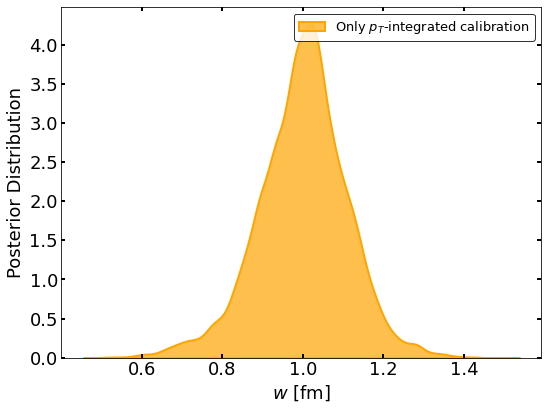

In [23]:
### Individual 1D plot of each of the two posteriors for ``w". A single plot with both posteriors (calibrated to integrated observables or calibrated to scaled spectra).

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

posterior_Grad_df = pd.read_csv("posterior/mcmc_chain_Grad.csv")
posterior_Grad_org_df = pd.read_csv("new_LHC_posterior_samples.csv")


fig_width = 8.6
fig_height = 6.45
font_size = 18

f = plt.figure(figsize=(fig_width, fig_height))

# Set tick parameters
plt.tick_params(
    axis='both',
    which='both',
    direction='in',
    bottom=True,
    top=True,
    left=True,
    right=True,
    labelsize=font_size,
    width=2,
    length=4,
    labelleft=True,  # Show labels on the left side of the y-axis
)

observables_to_plot=3 # Select a parameter to plot 1-D individual plots

#sns.kdeplot(posterior_Grad_df, x=posterior_Grad_df.columns[observables_to_plot], 
#            fill=True, label='Only scaled spectra calibration', 
#            color='blue',linewidth=2, shade=True, alpha=.7)

sns.kdeplot(posterior_Grad_org_df, x=posterior_Grad_df.columns[observables_to_plot], 
            fill=True, label='Only $p_T$-integrated calibration', 
            color='orange', linewidth=2, shade=True, alpha=.7)

plt.legend(loc='best',fontsize=13, frameon=True, edgecolor='black', )
plt.xlabel(posterior_Grad_df.columns[observables_to_plot], fontsize=18)
plt.ylabel('Posterior Distribution', fontsize=18)

plt.savefig('single_parameter_plot_Grad_original.pdf', format='pdf', dpi=300)
#plt.show()